In [1]:
!pip install tensorflow_addons
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 30.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 30.6 MB/s 
     |████████████████████████████████| 295 kB 85.8 MB/s 
     |████████████████████████████████| 965 kB 70.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


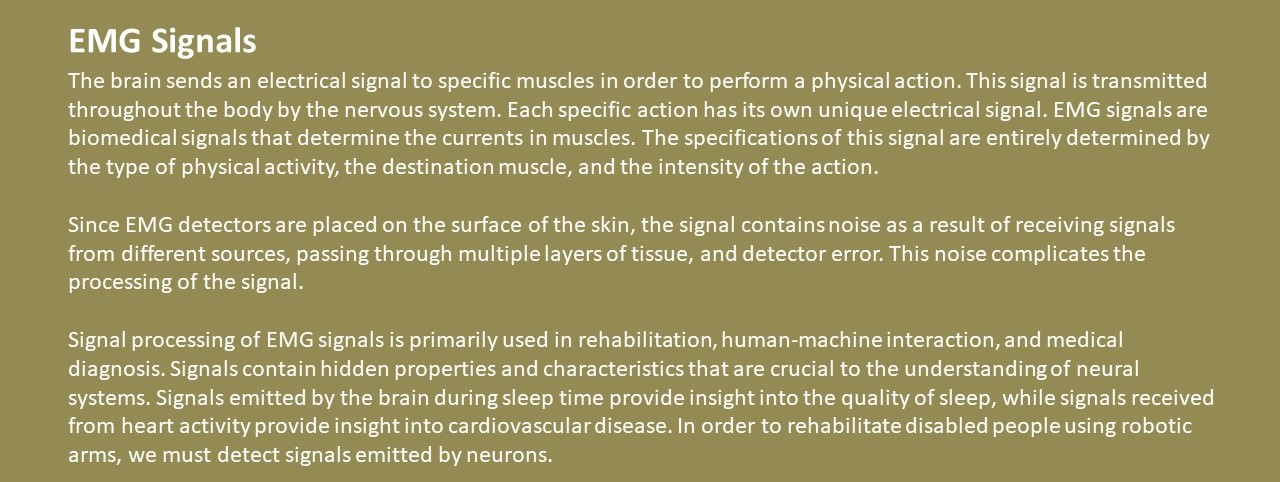

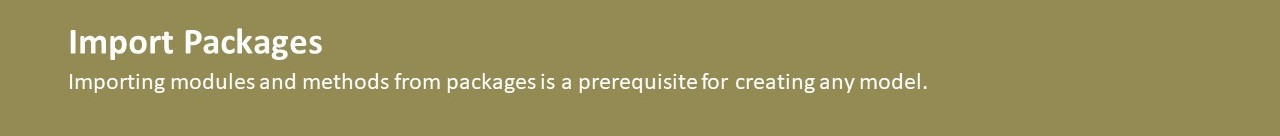

In [1]:
import tensorflow as tf

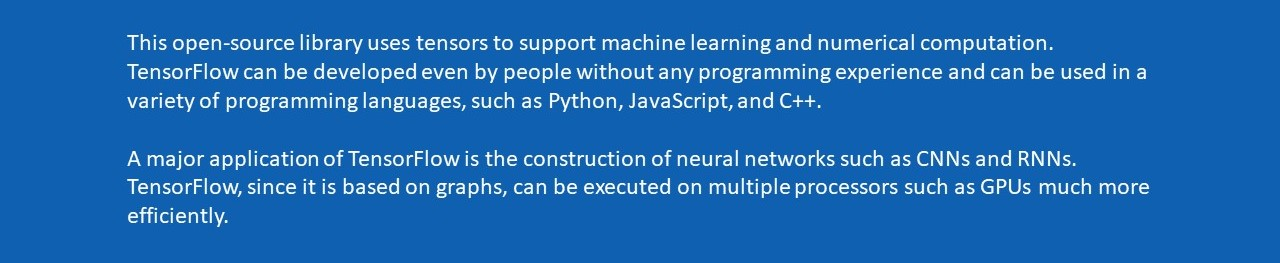

In [2]:
import tensorflow.keras.layers as tfl
from tensorflow.keras.layers import Dense, Input, Flatten

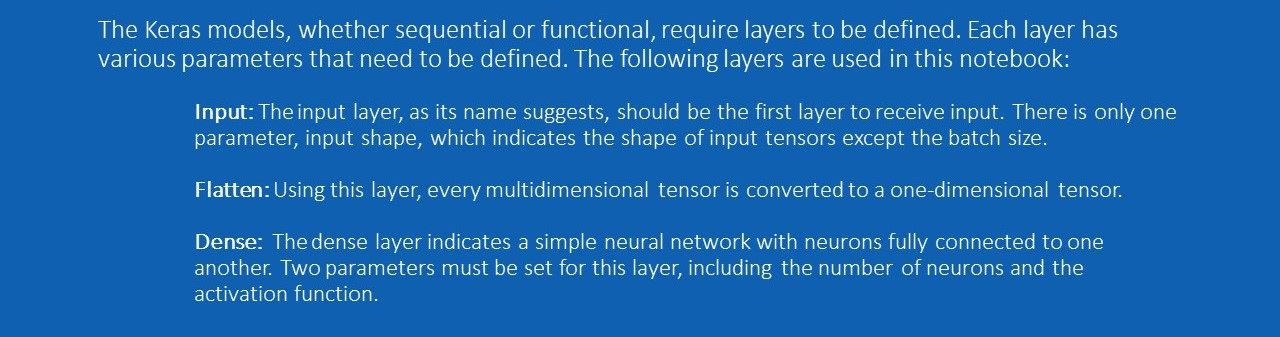

In [3]:
import numpy as np

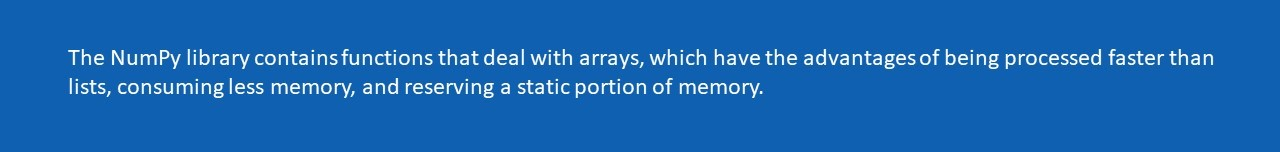

In [4]:
import matplotlib.pyplot as plt 

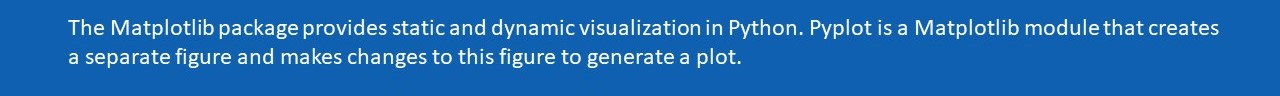

In [5]:
from tensorflow_addons.metrics import F1Score

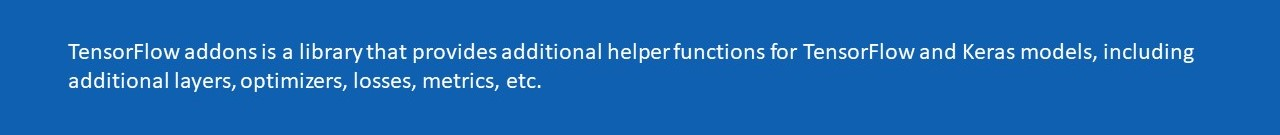

In [6]:
import pandas as pd

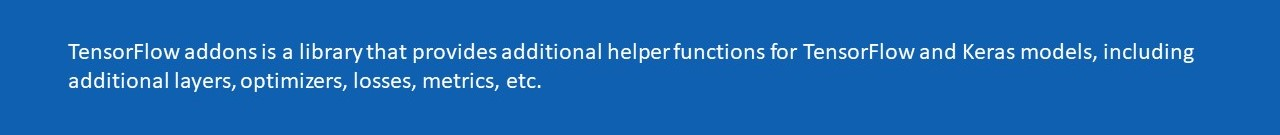

In [7]:
from copy import deepcopy

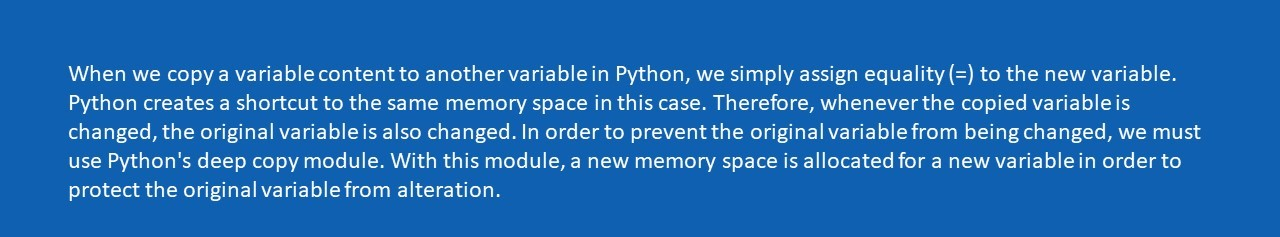

In [52]:
import seaborn as sns

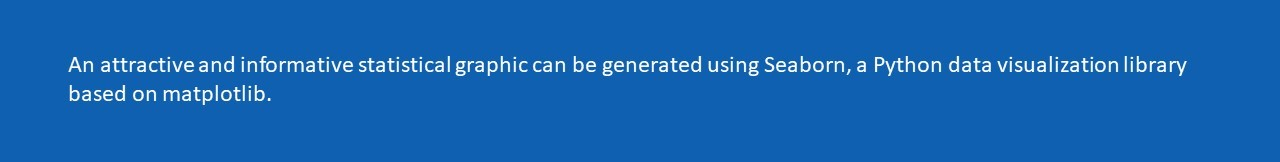

In [58]:
from sklearn.metrics import classification_report

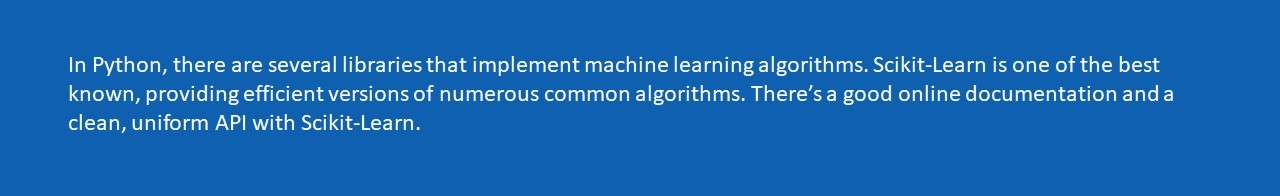

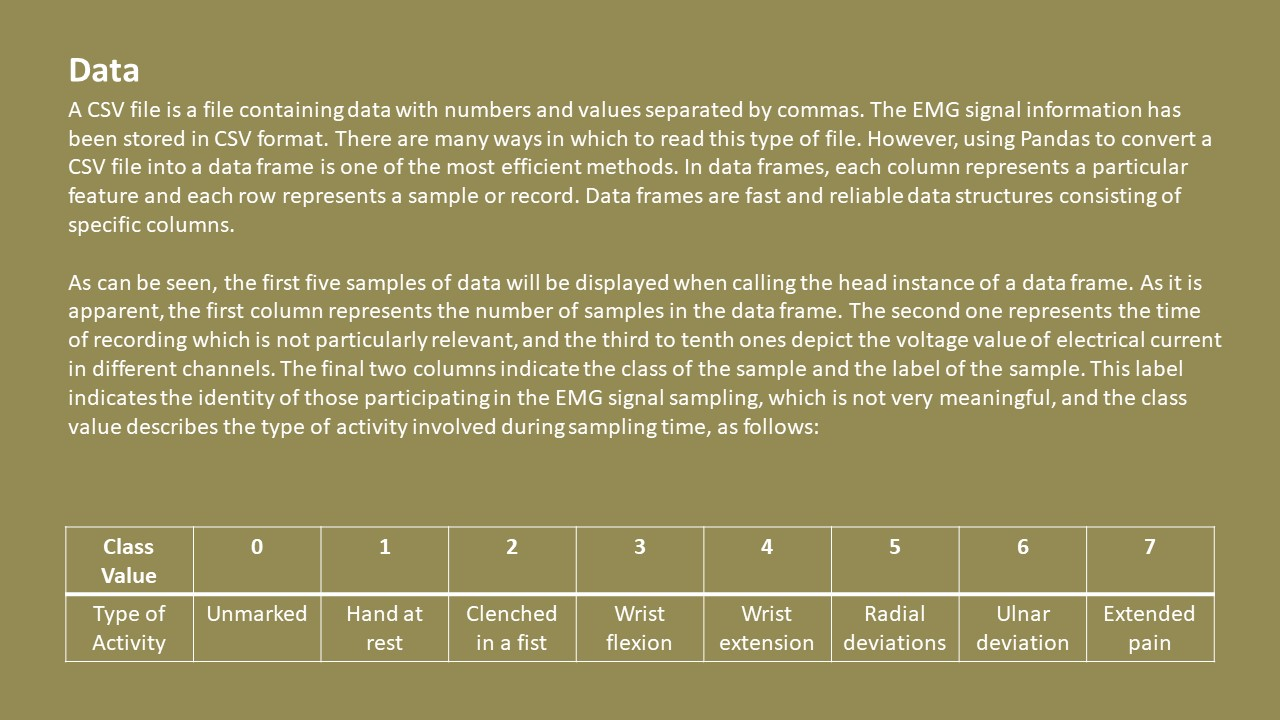

In [8]:
dataframe = pd.read_csv("/content/drive/MyDrive/Documents/AI book/Chapter 5/Chapter 5 Data/EMG-data.csv")
dataframe.head()

time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  label  
0  -0.00001      0      1  
1  -0.00001      0      1  
2   0.00001      0      1  
3   0.00001      0      1  
4   0.00001      0      1

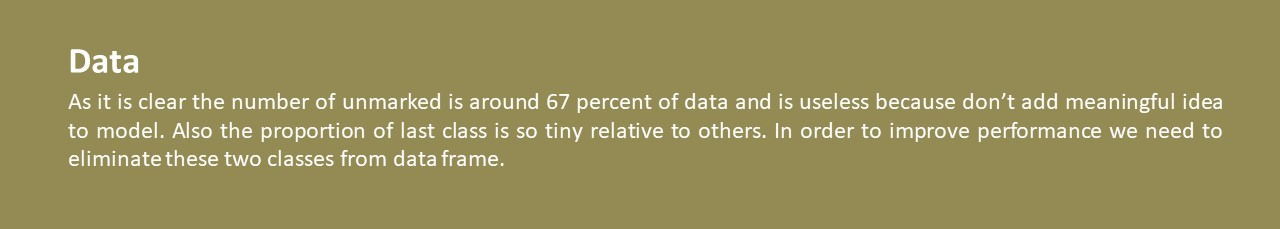

In [9]:
dataframe['class'].value_counts().to_dict()

{0: 2725157,
 6: 253009,
 5: 251733,
 4: 251570,
 1: 250055,
 3: 249494,
 2: 243193,
 7: 13696}

In [10]:
first_indices = dataframe[dataframe['class'] == 0].index 
last_indices = dataframe[dataframe['class'] == 7].index
dataframe.drop(first_indices, inplace = True)
dataframe.drop(last_indices, inplace=True)
dataframe.reset_index(inplace=True)

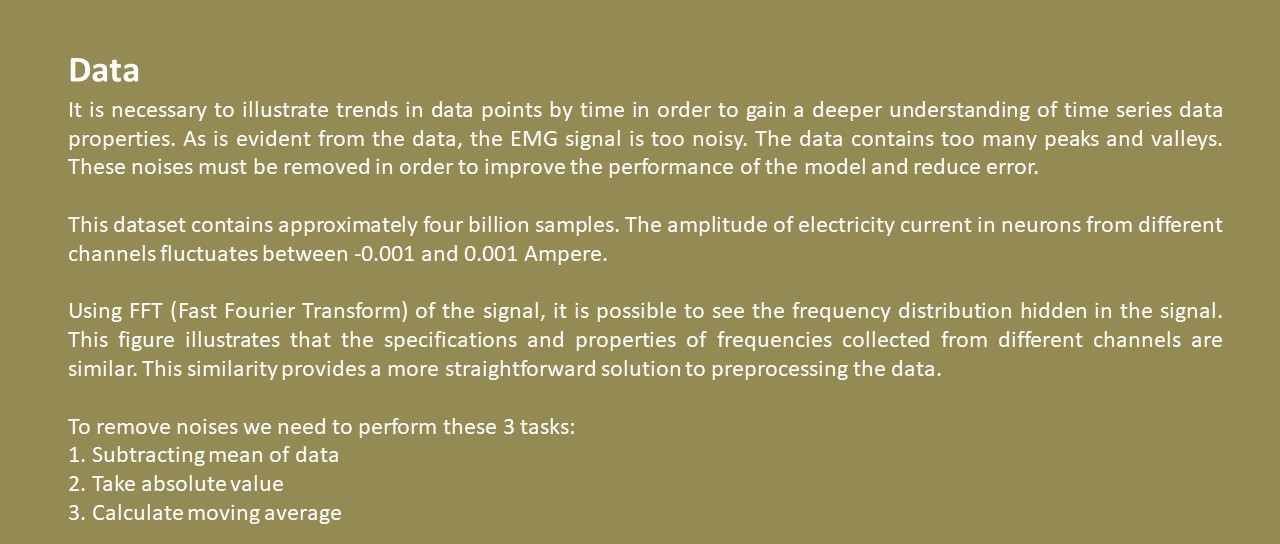

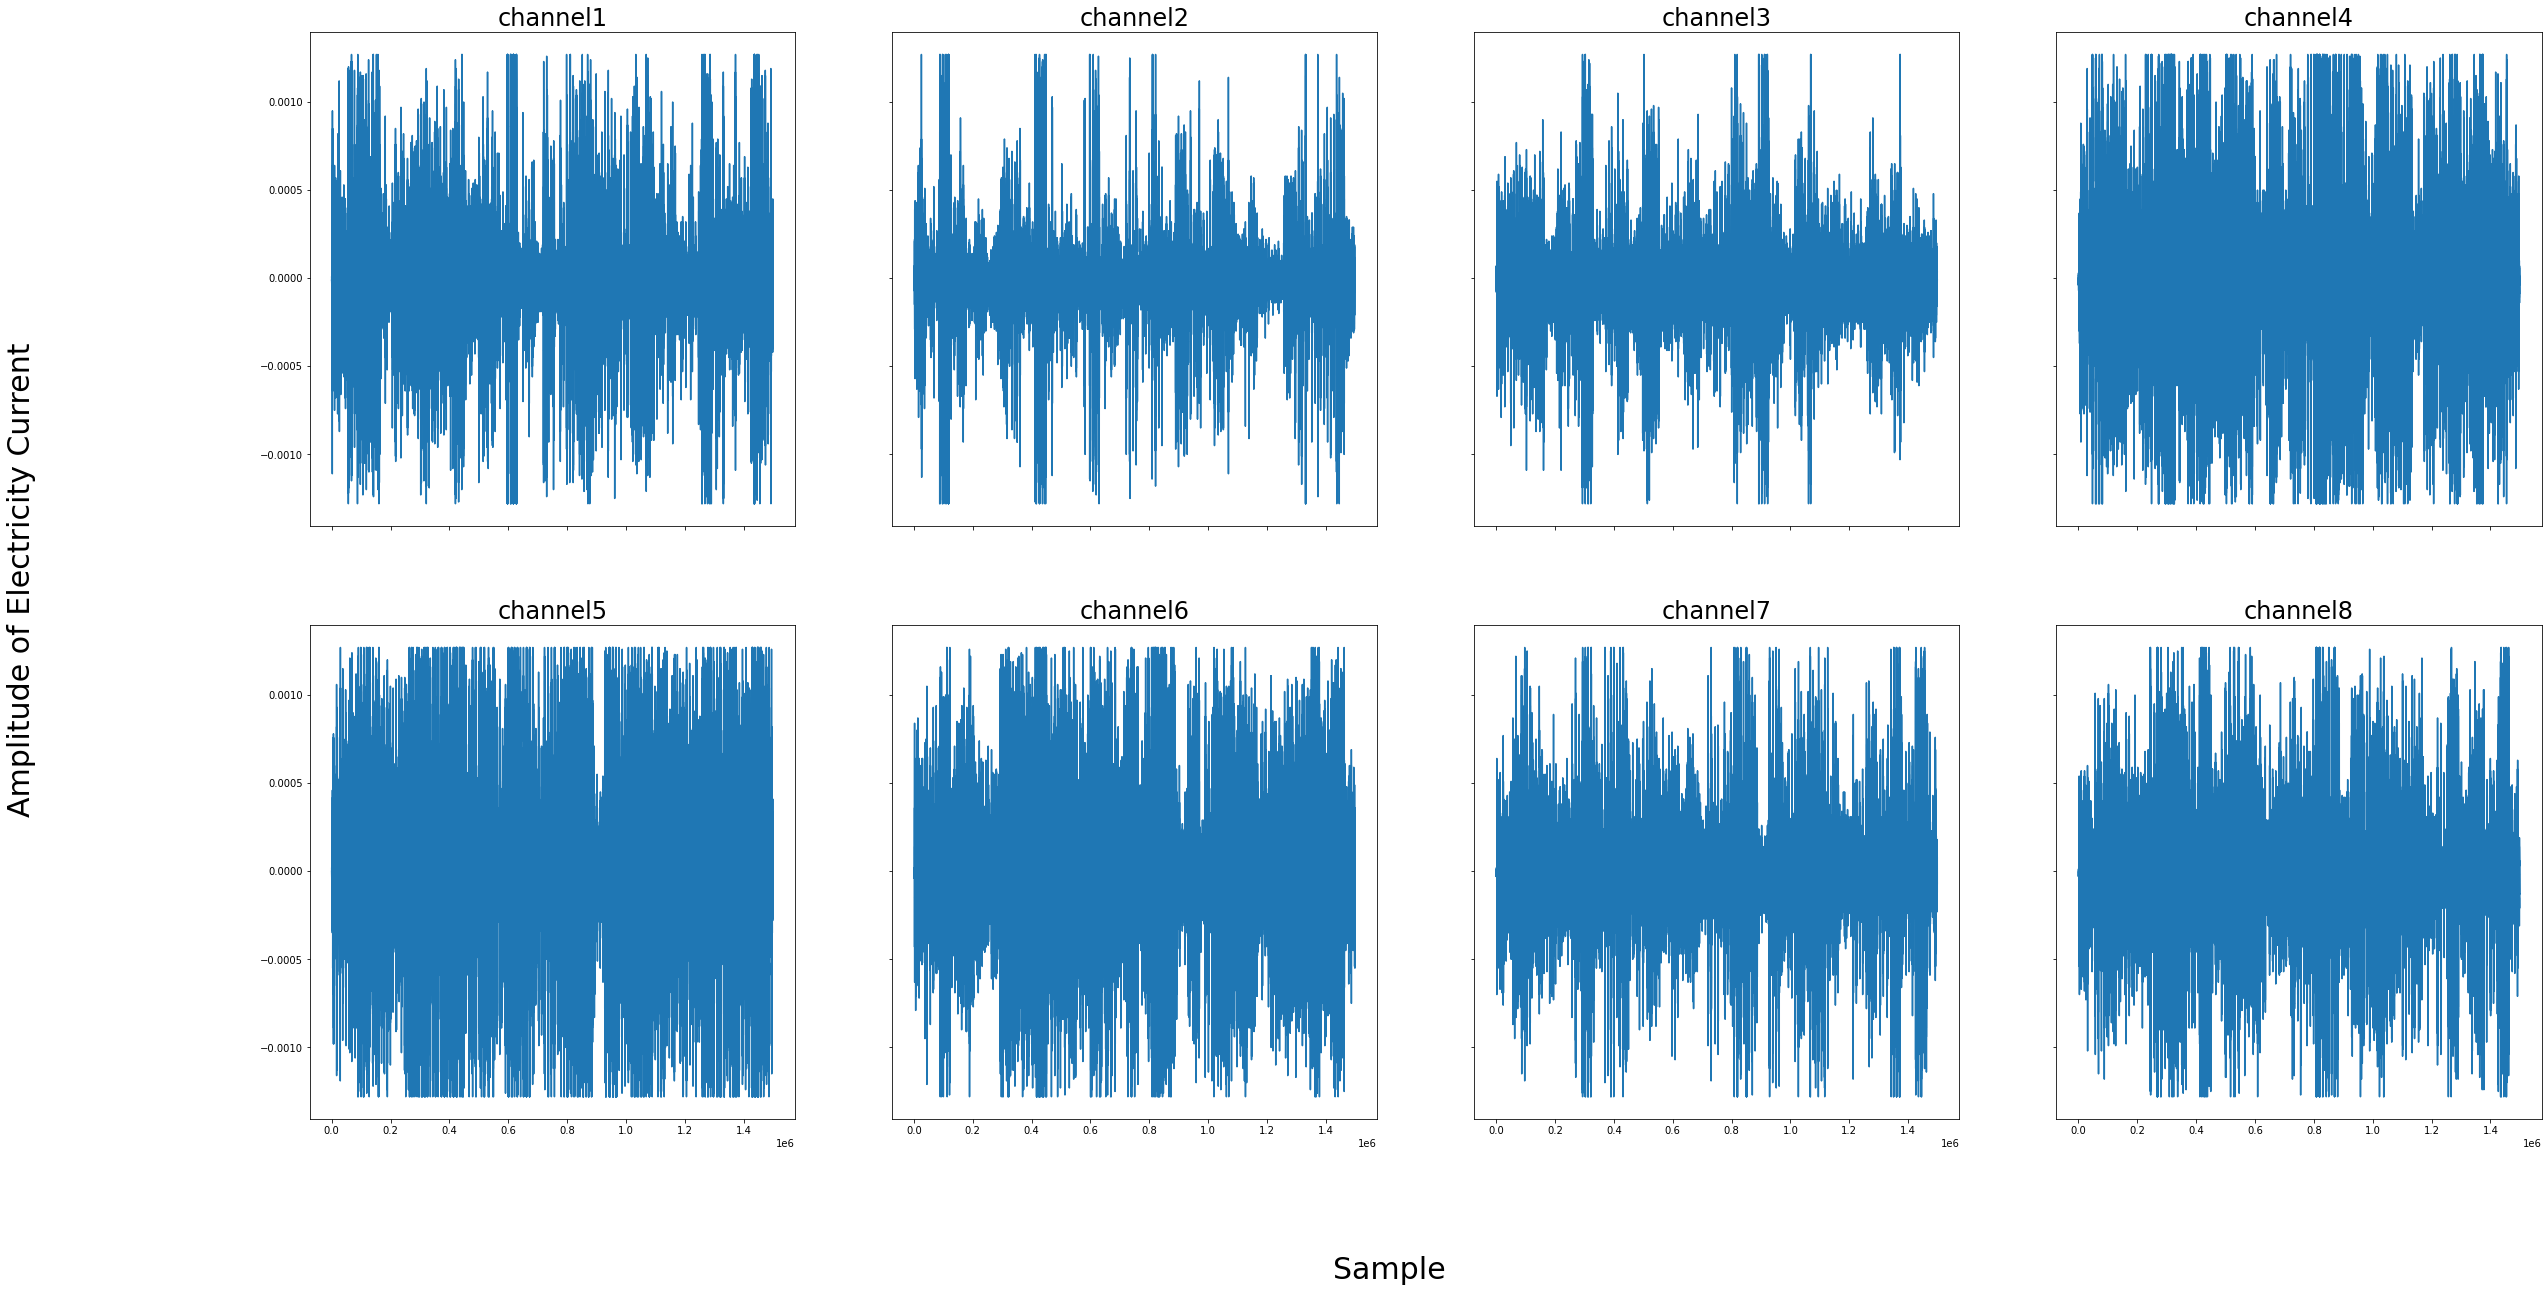

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(40, 20))
fig.supylabel('Amplitude of Electricity Current', fontsize=30)
fig.supxlabel('Sample', fontsize=30)

for i in range(2):
  for j in range(4):
    ax[i, j].plot(dataframe[f'channel{4*i+j+1}'])
    ax[i, j].set_title(f'channel{4*i+j+1}', fontsize=24)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


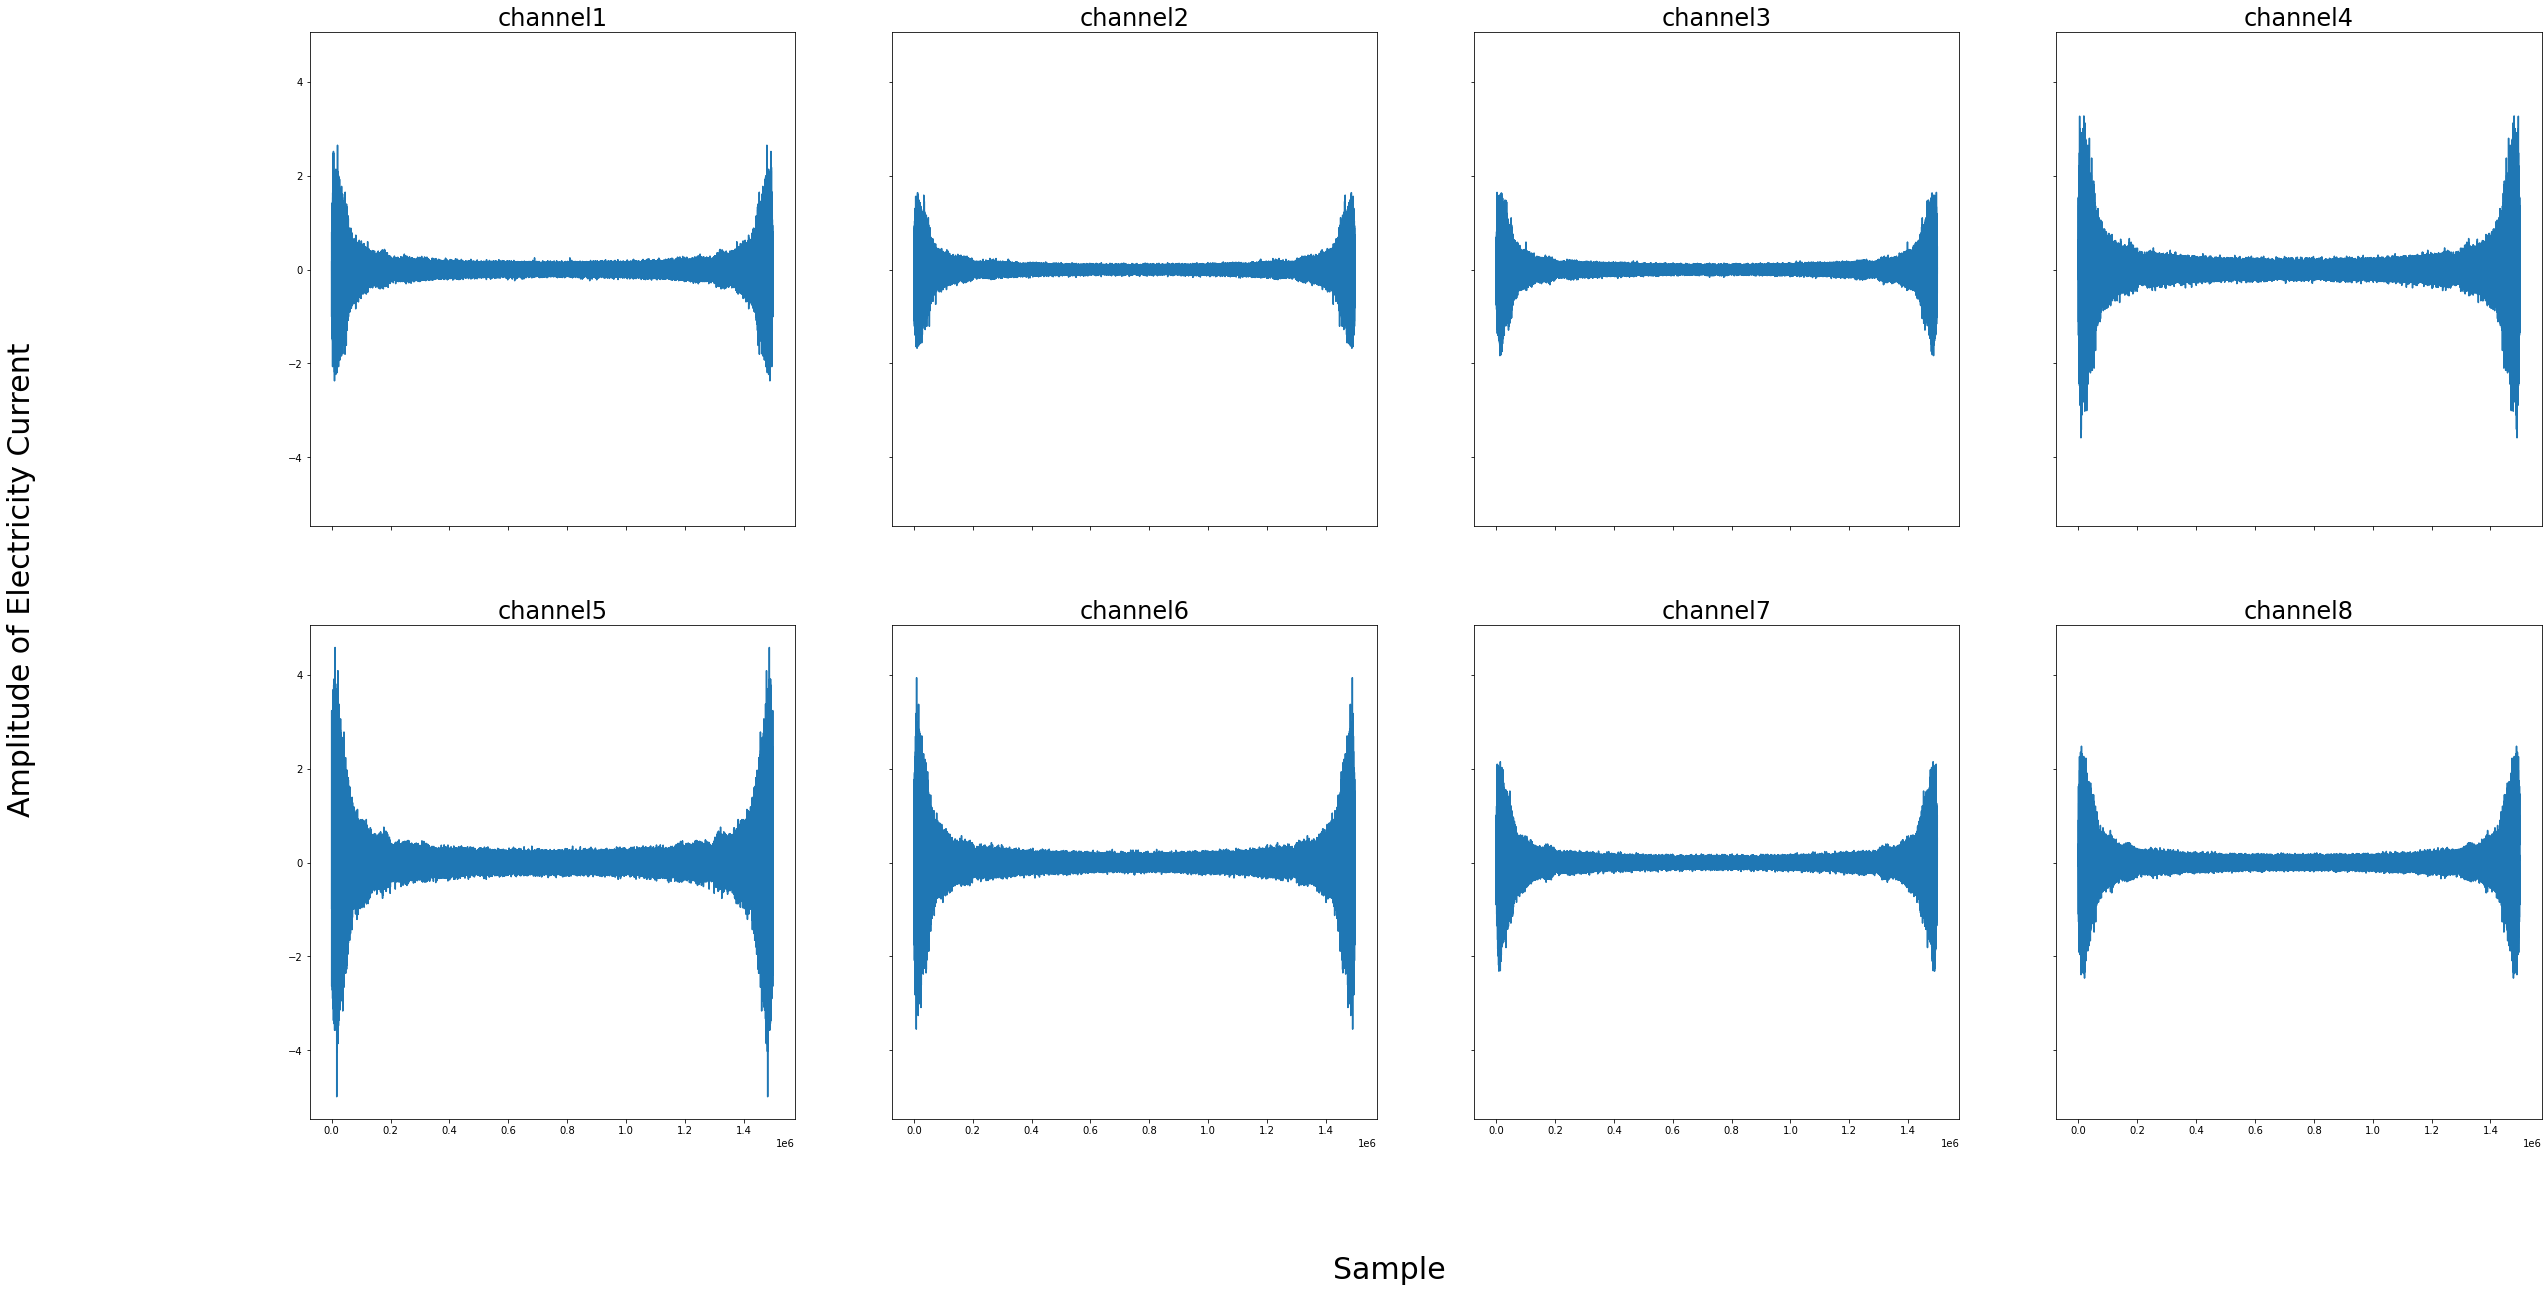

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(40, 20))
fig.supylabel('Amplitude of Electricity Current', fontsize=30)
fig.supxlabel('Sample', fontsize=30)

for i in range(2):
  for j in range(4):
    fourier = np.fft.fft(dataframe[f'channel{4*i+j+1}'])
    ax[i, j].plot(fourier[1:])
    ax[i, j].set_title(f'channel{4*i+j+1}', fontsize=24)

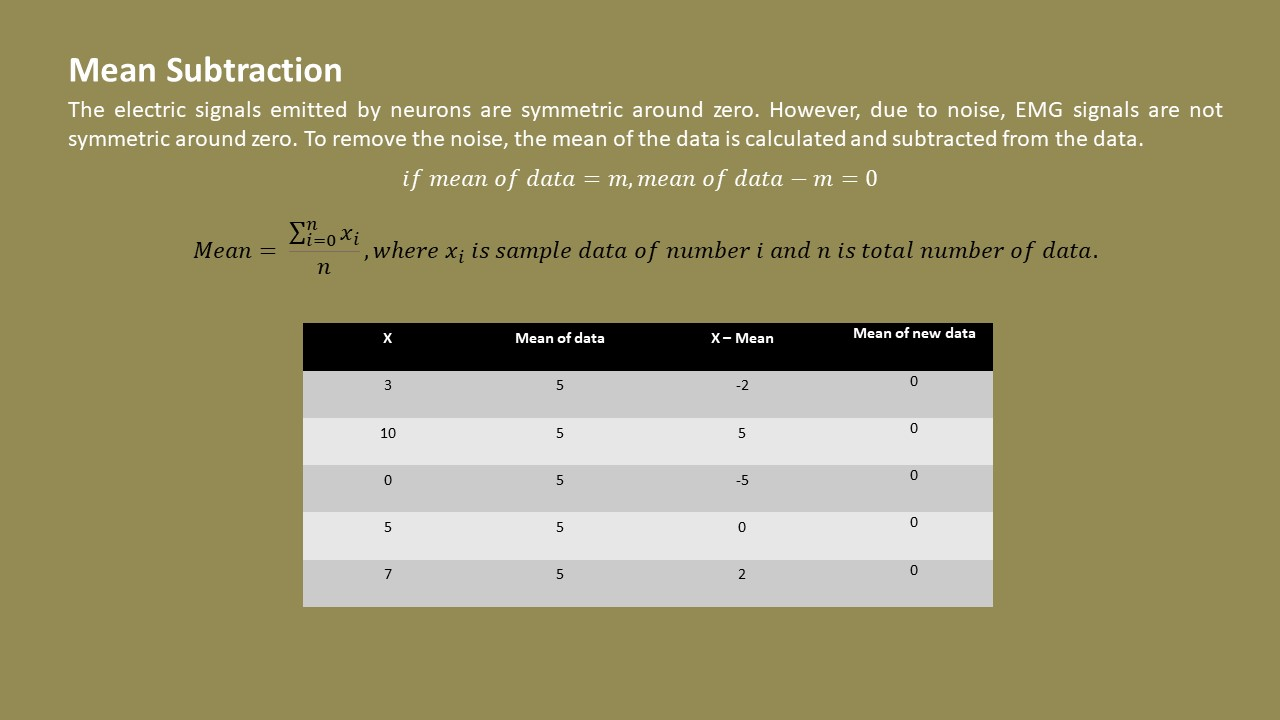

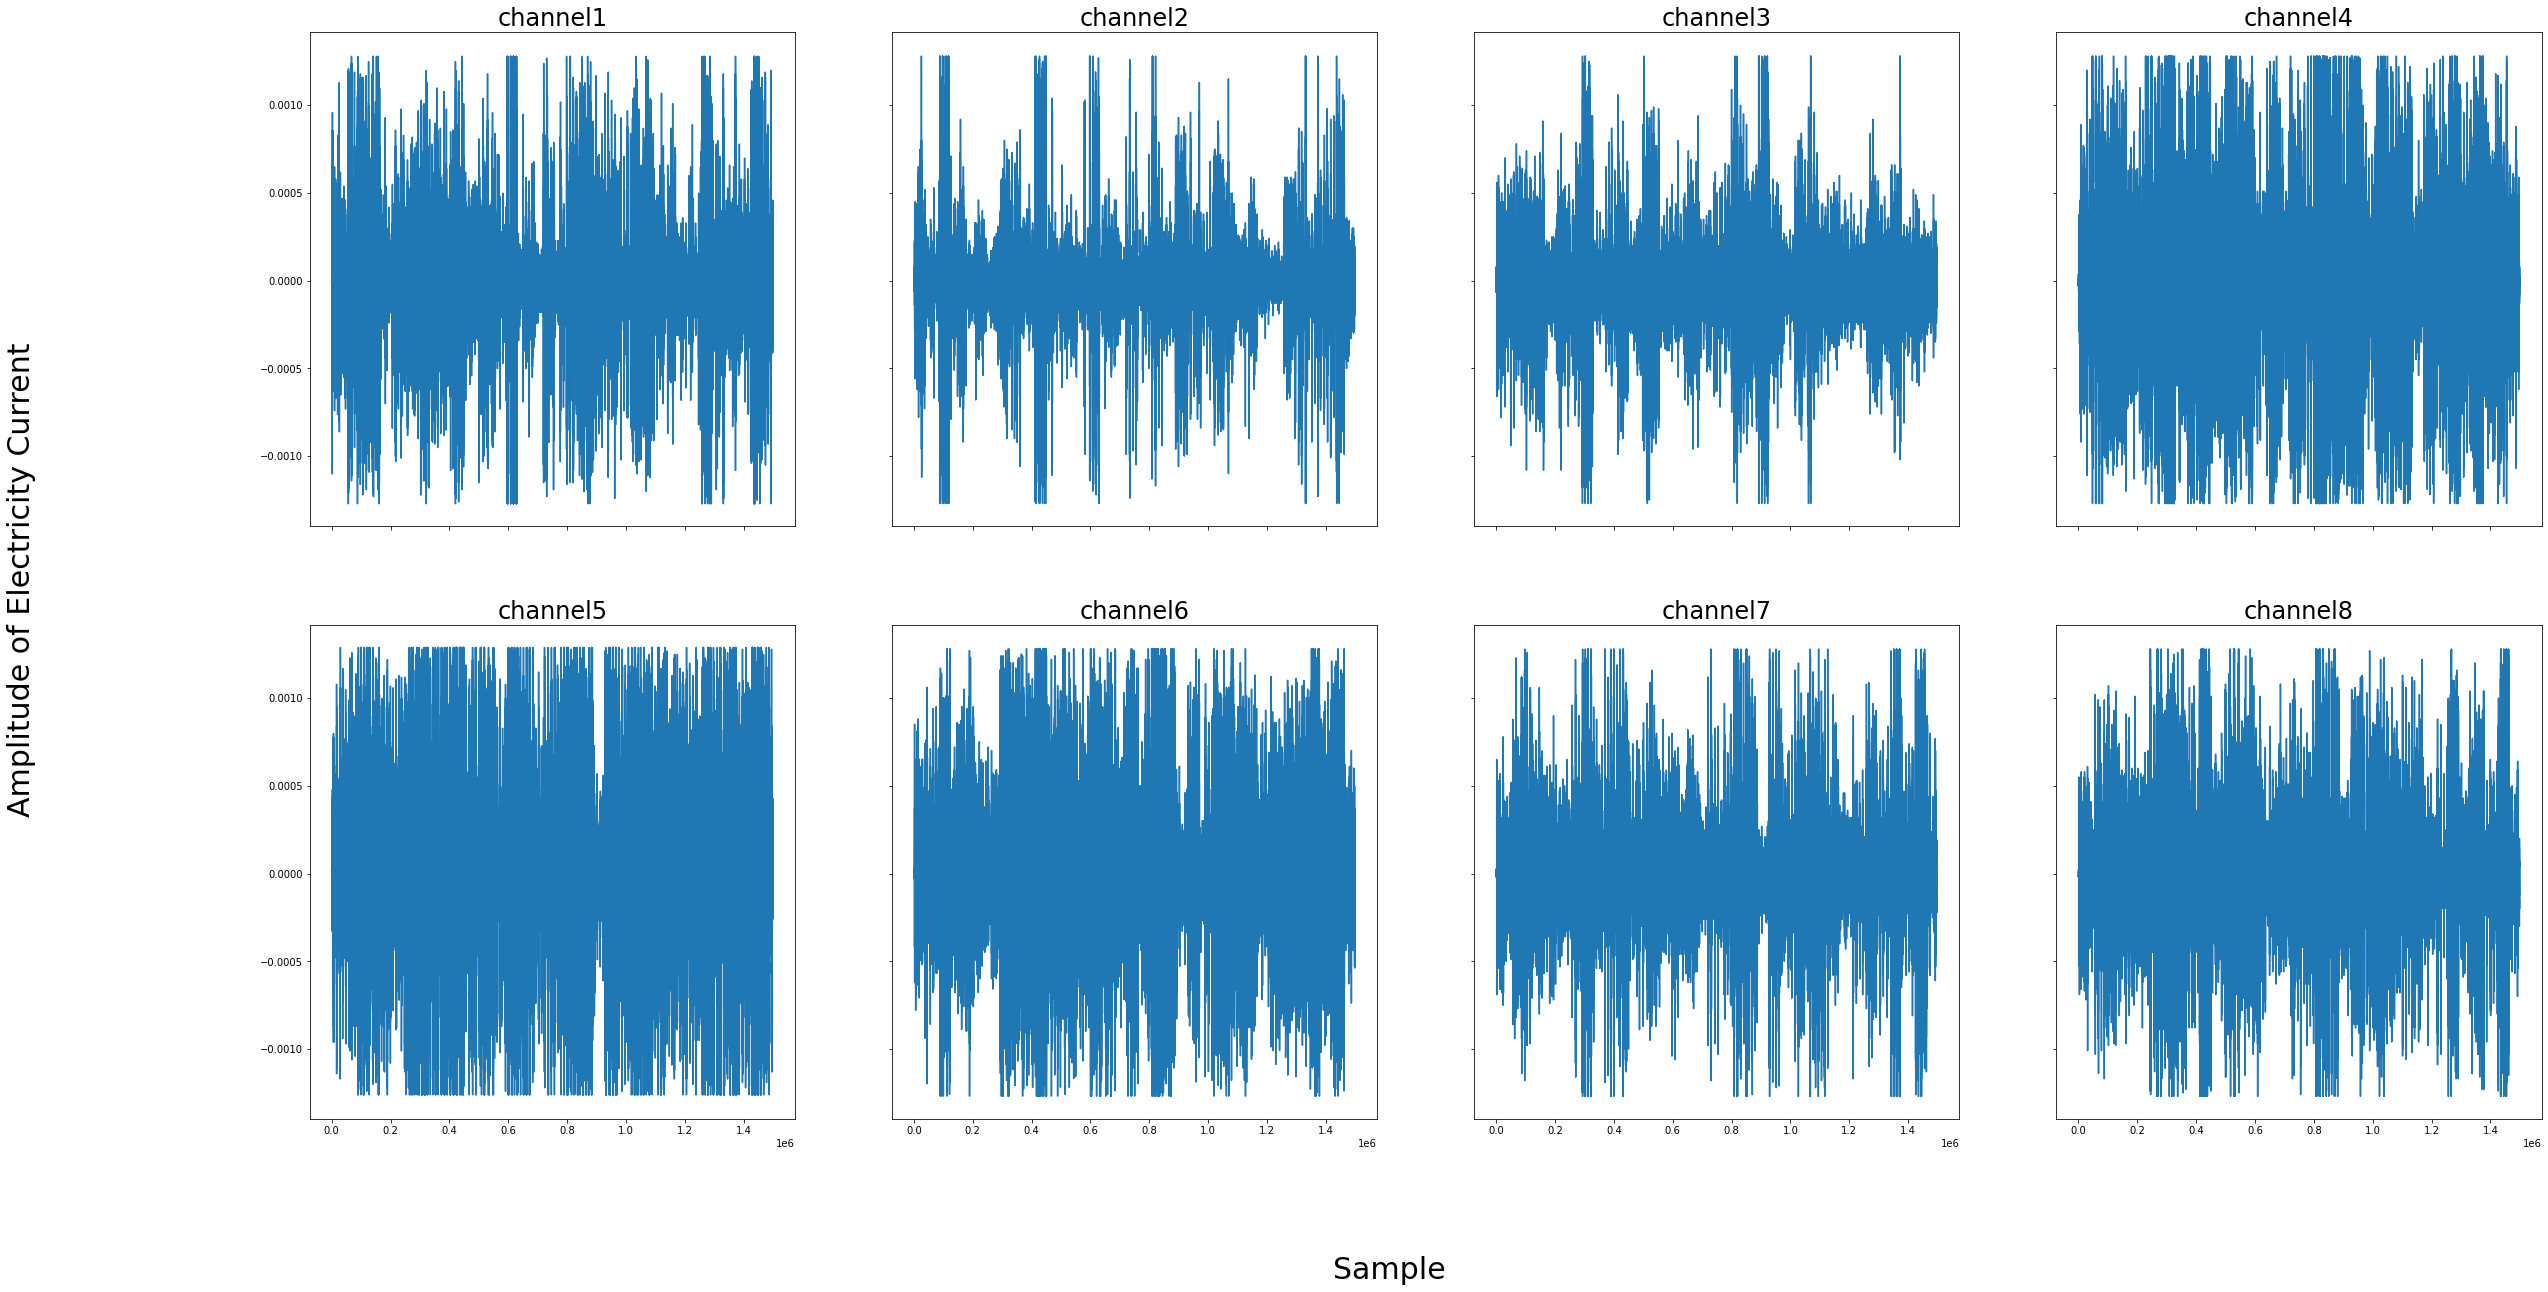

In [17]:
dataset = deepcopy(dataframe)
fig, ax = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(40, 20))
fig.supylabel('Amplitude of Electricity Current', fontsize=30)
fig.supxlabel('Sample', fontsize=30)

for i in range(2):
  for j in range(4):
    mean = np.mean(dataset[f'channel{4*i+j+1}'])
    dataset[f'symmetrical_channel{4*i+j+1}'] = dataset[f'channel{4*i+j+1}'] - mean
    dataset.pop(f'channel{4*i+j+1}')
    ax[i, j].plot(dataset[f'symmetrical_channel{4*i+j+1}'])
    ax[i, j].set_title(f'channel{4*i+j+1}', fontsize=24)

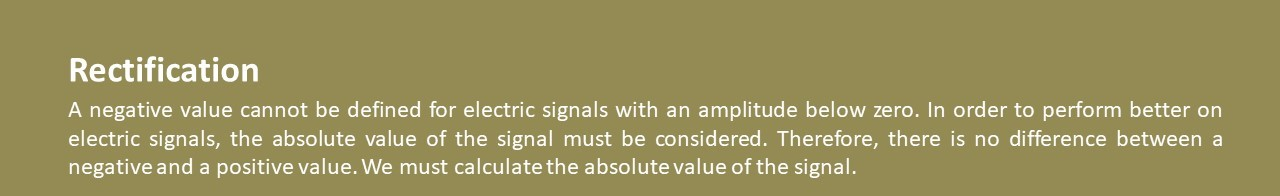

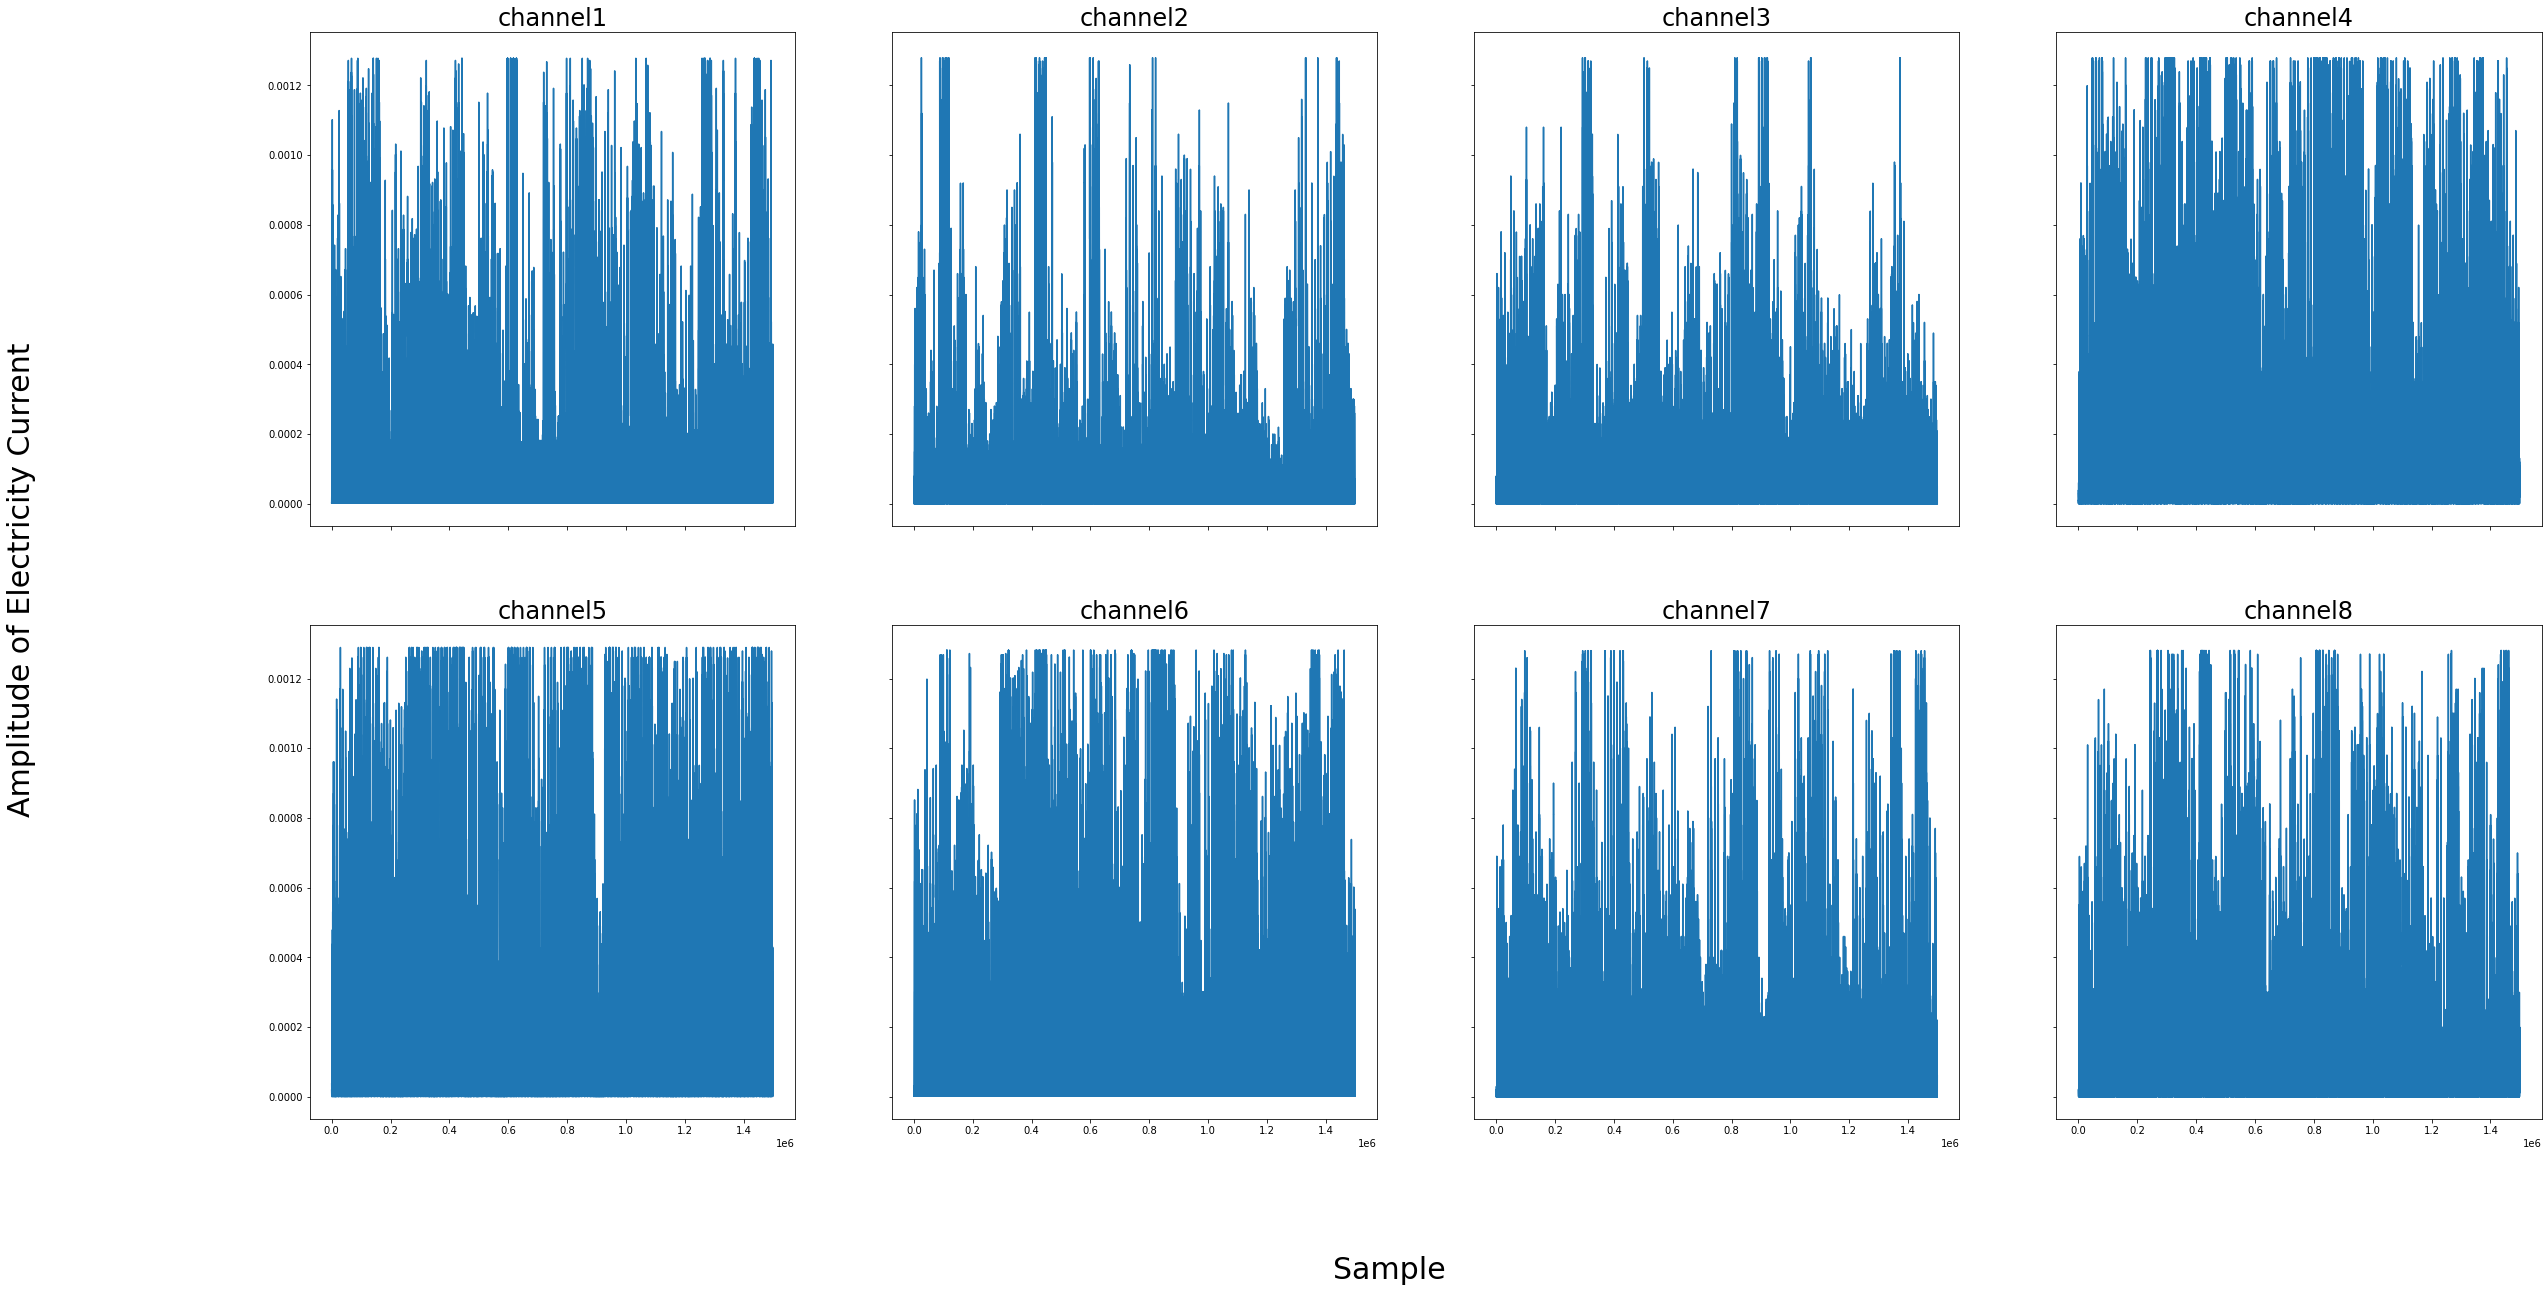

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(40, 20))
fig.supylabel('Amplitude of Electricity Current', fontsize=30)
fig.supxlabel('Sample', fontsize=30)

for i in range(2):
  for j in range(4):
    dataset[f'abs_channel{4*i+j+1}'] = np.abs(dataset[f'symmetrical_channel{4*i+j+1}'])
    dataset.pop(f'symmetrical_channel{4*i+j+1}')
    ax[i, j].plot(dataset[f'abs_channel{4*i+j+1}'])
    ax[i, j].set_title(f'channel{4*i+j+1}', fontsize=24)

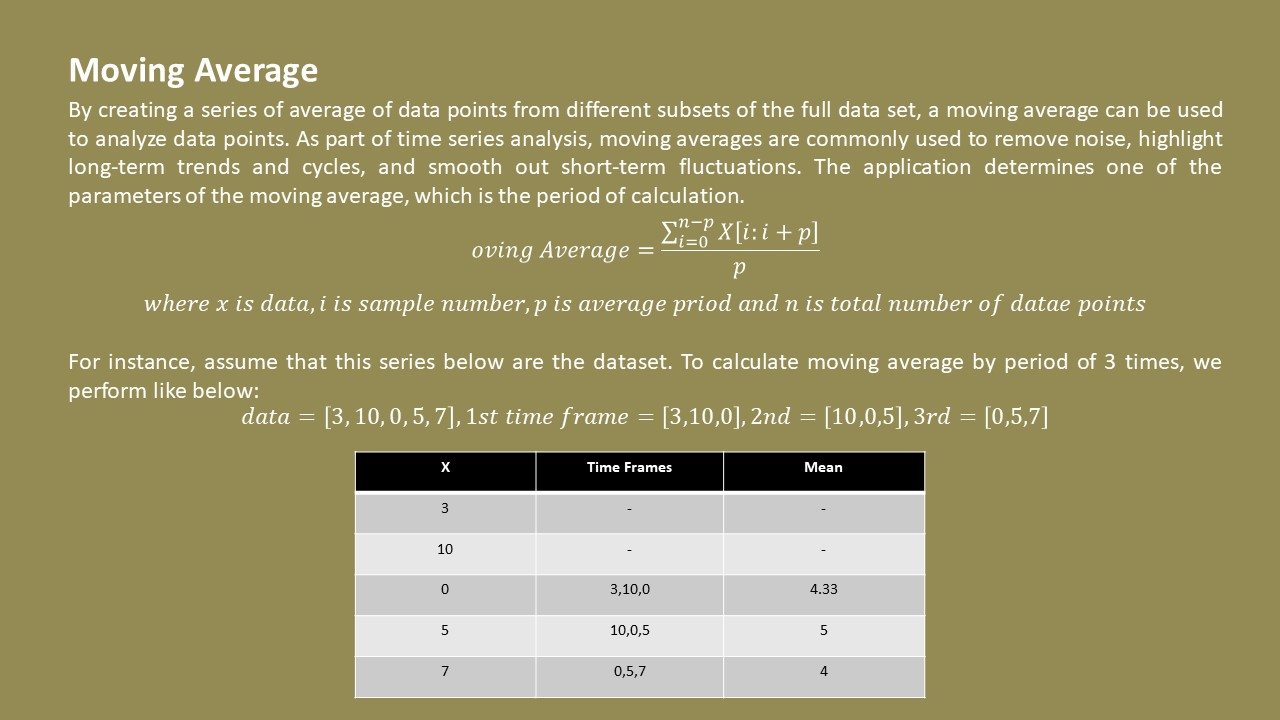

In [18]:
ma_rate = 100
def moving_average(arr, n=3):
  arr = np.array(arr)
  data_length = arr.shape[0]
  new_arr = np.zeros((data_length))
  for i in range(n):
    new_arr[n-1:] += arr[i: data_length-n+1+i]
  new_arr /= n
  return new_arr

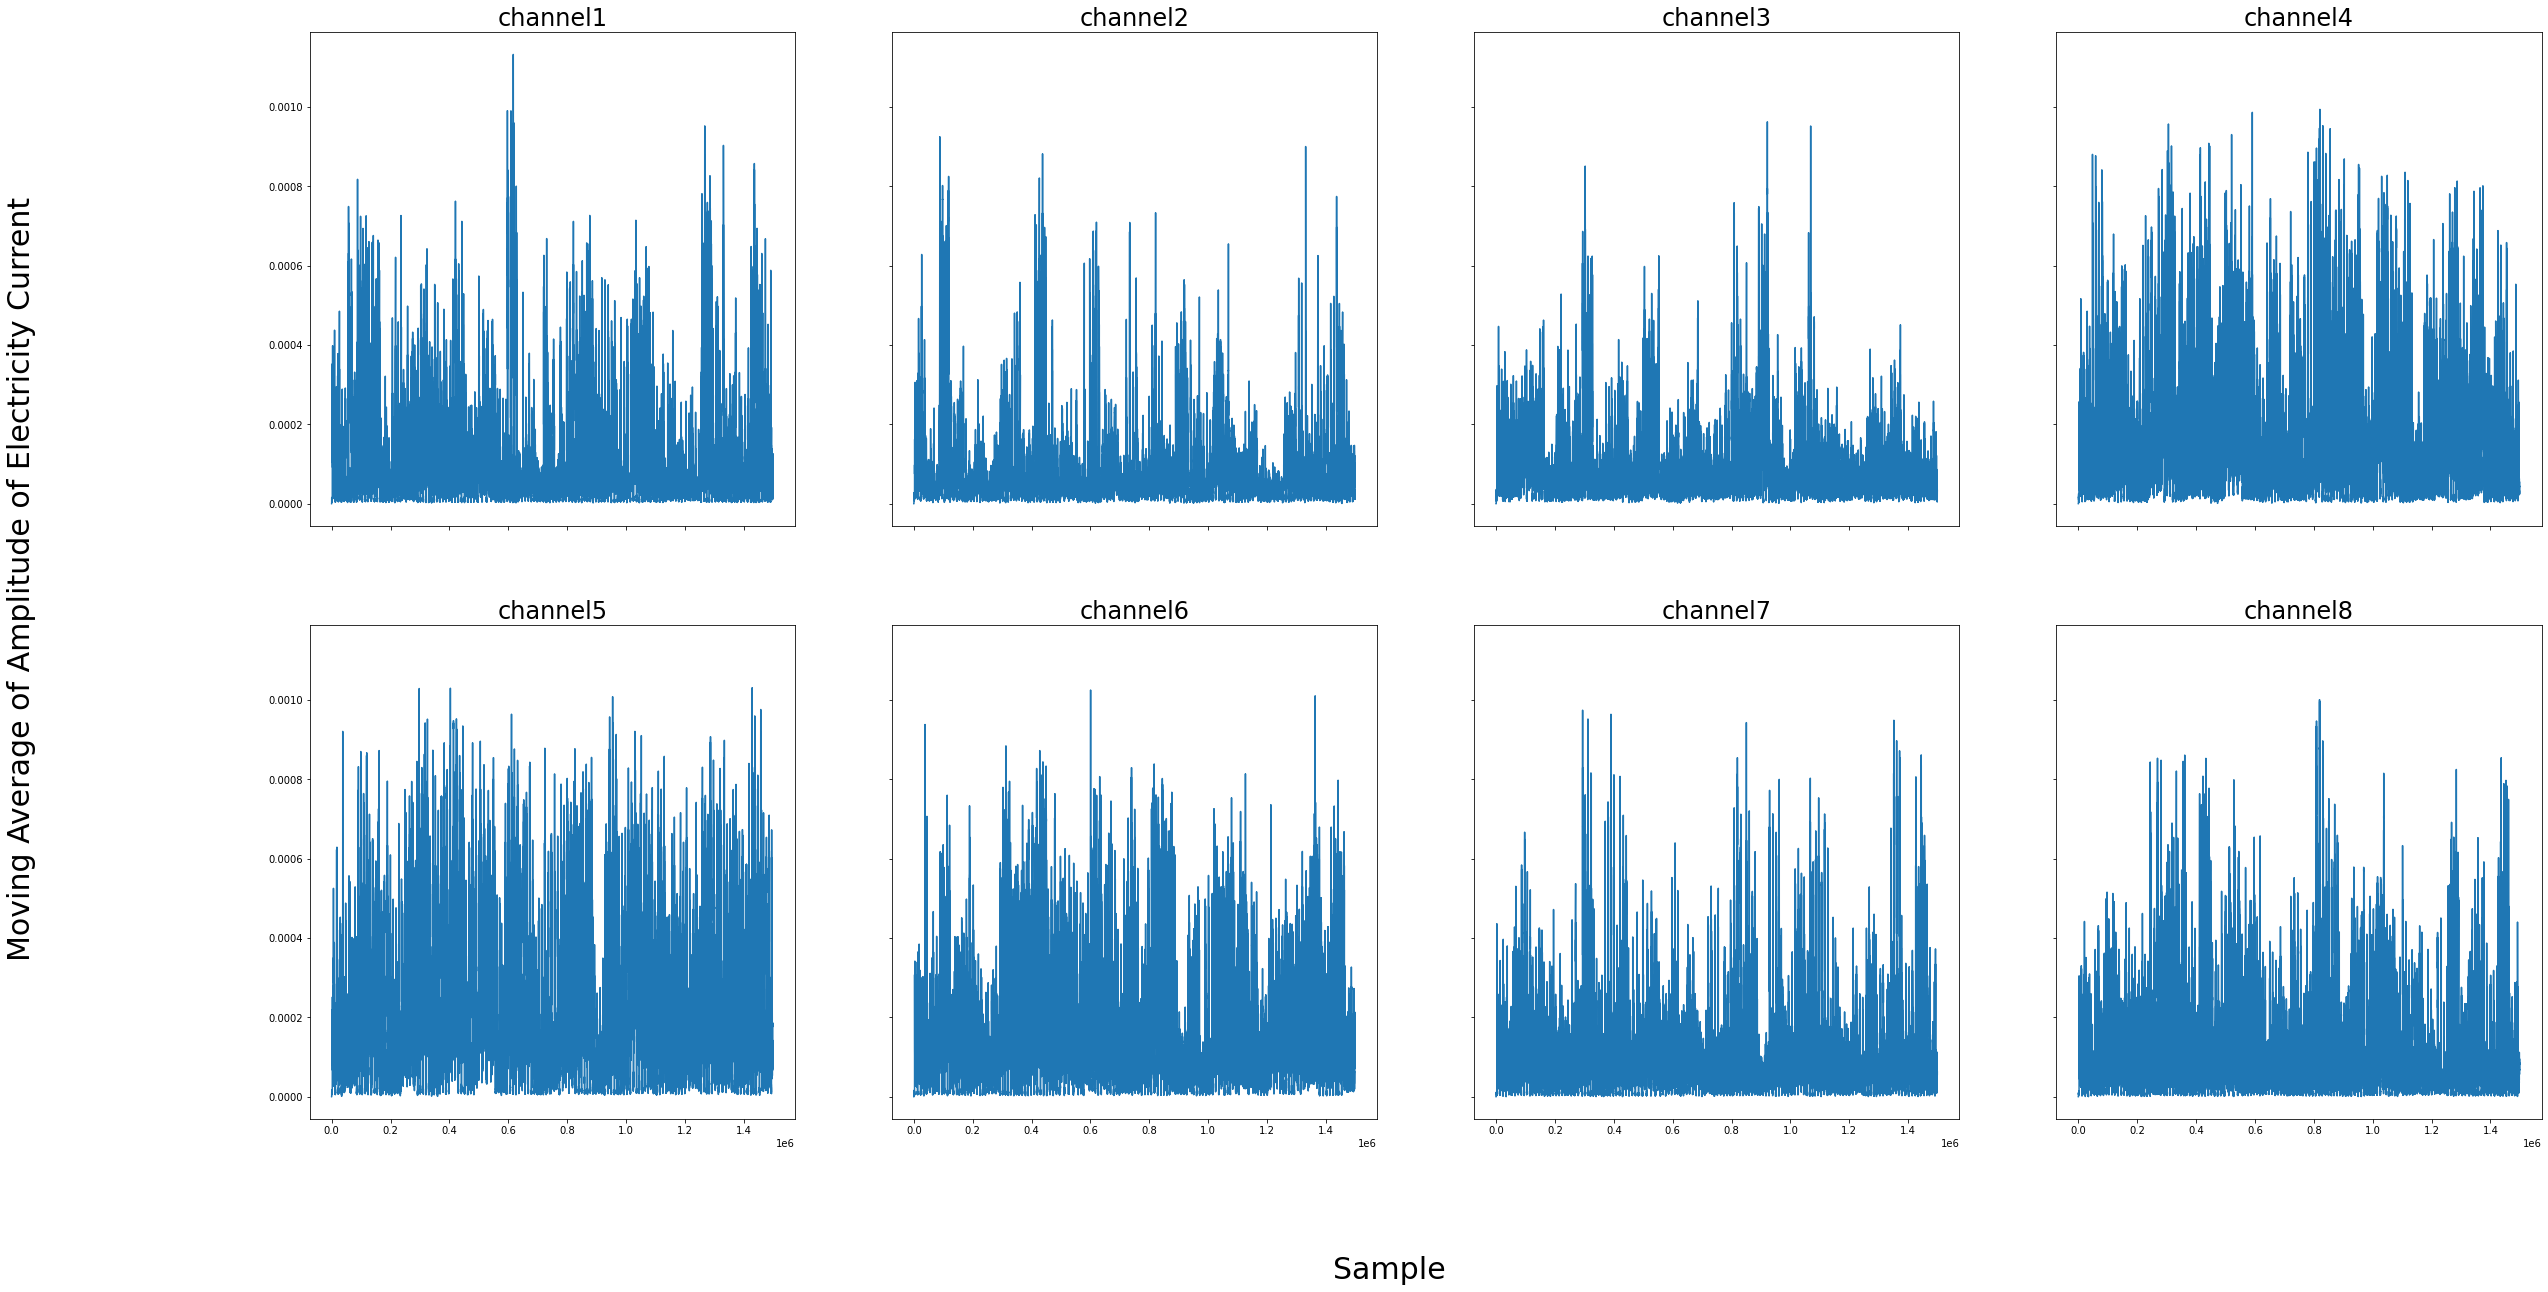

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(40, 20))
fig.supylabel('Moving Average of Amplitude of Electricity Current', fontsize=30)
fig.supxlabel('Sample', fontsize=30)

for i in range(2):
  for j in range(4):
    dataset[f'f_channel{4*i+j+1}'] = moving_average(dataset[f'abs_channel{4*i+j+1}'], ma_rate)
    ax[i, j].plot(dataset[f'f_channel{4*i+j+1}'])
    ax[i, j].set_title(f'channel{4*i+j+1}', fontsize=24)

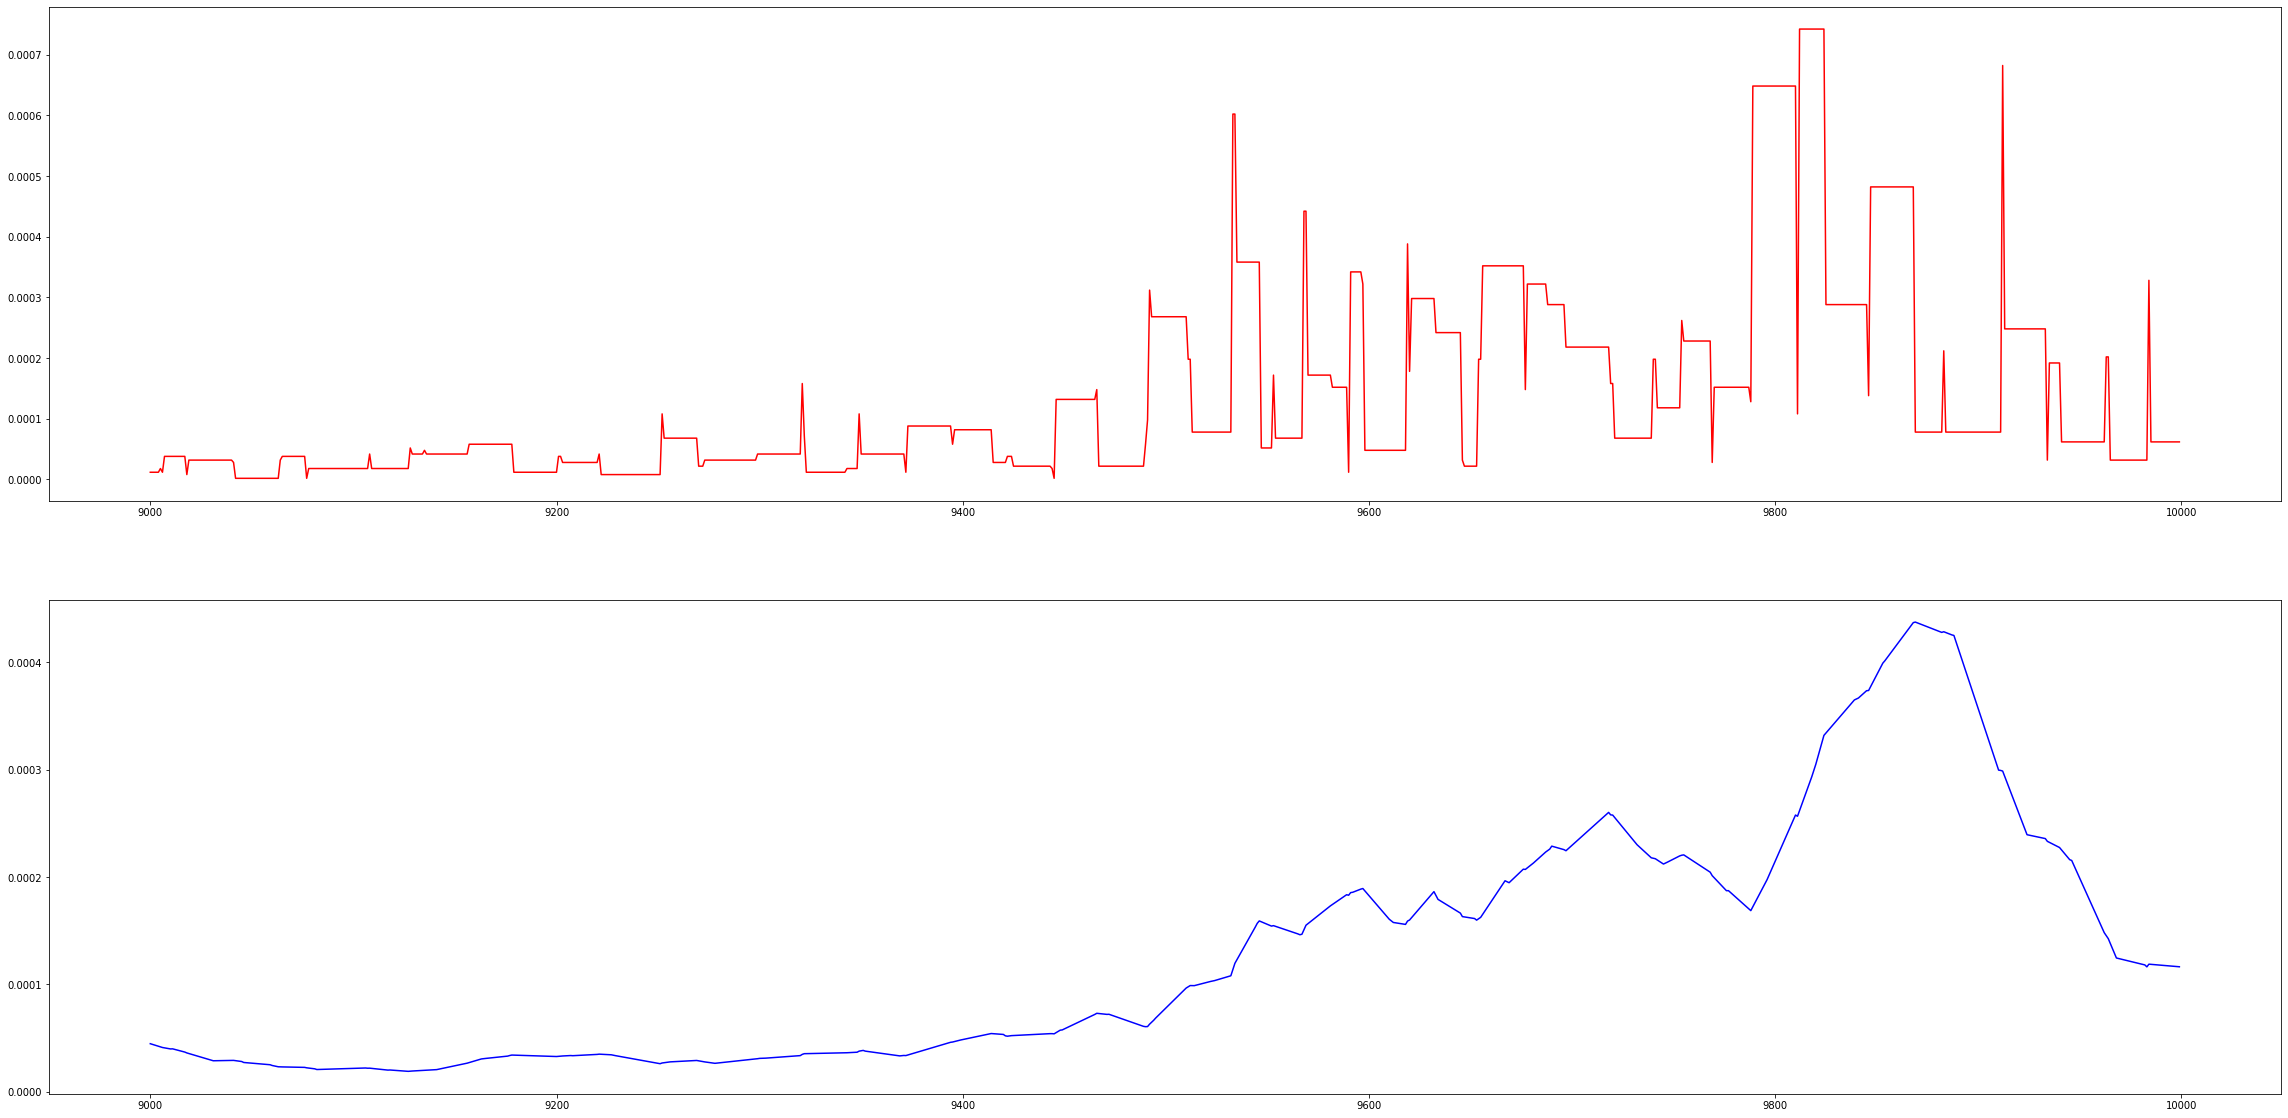

In [23]:
plt.figure(figsize=(40, 20))
plt.subplot(2, 1, 1)
plt.plot(dataset['abs_channel1'][9000:10000], color='r')
plt.subplot(2, 1, 2)
plt.plot(dataset['f_channel1'][9000:10000], color='b')

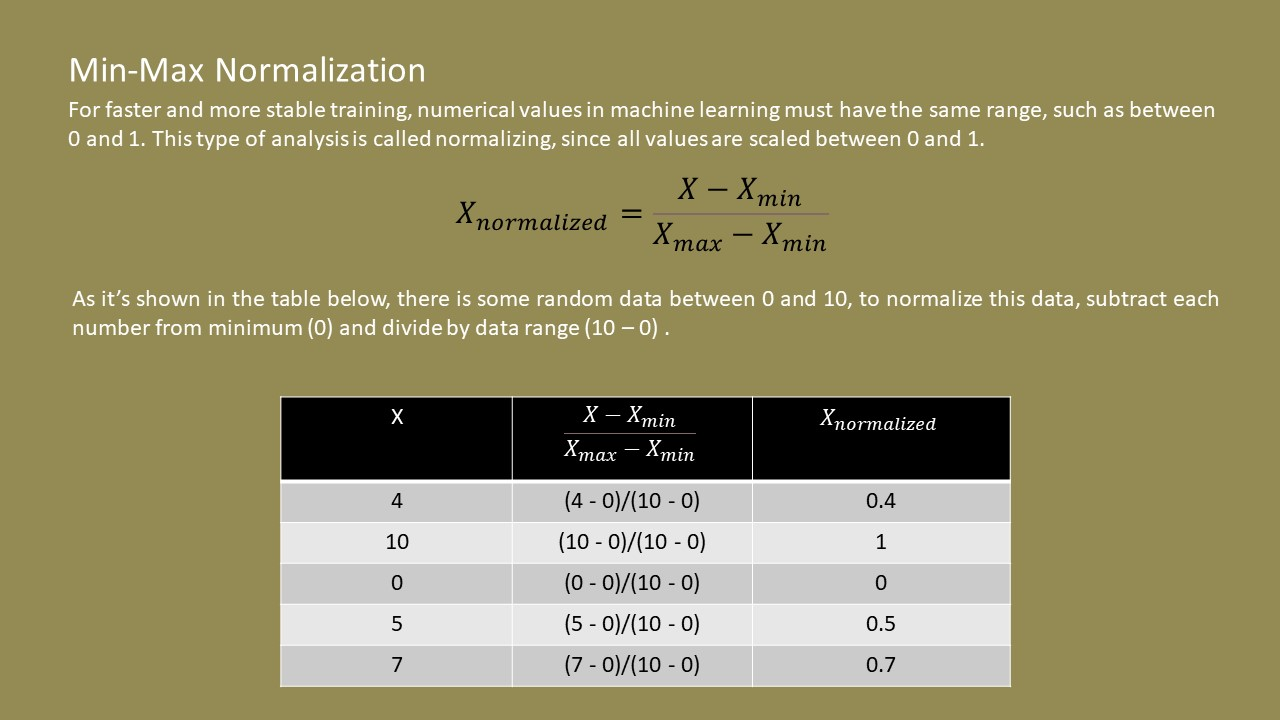

In [24]:
for i in range(1, 9):
    mini = min(dataset[f'f_channel{i}'])
    maxi = max(dataset[f'f_channel{i}'])
    dataset[f'n_channel{i}'] = (dataset[f'f_channel{i}'] - mini)/(maxi - mini)
    dataset.pop(f'f_channel{i}')

In [25]:
dataset[:101]

index  time  class  label  abs_channel1  abs_channel2  abs_channel3  \
0     2287  2400      1      1      0.000002       0.00001  3.765642e-07   
1     2288  2401      1      1      0.000002       0.00001  9.623436e-06   
2     2289  2402      1      1      0.000002       0.00001  9.623436e-06   
3     2290  2403      1      1      0.000002       0.00001  9.623436e-06   
4     2291  2404      1      1      0.000002       0.00001  9.623436e-06   
..     ...   ...    ...    ...           ...           ...           ...   
96    2383  2498      1      1      0.000008       0.00001  3.037656e-05   
97    2384  2499      1      1      0.000008       0.00001  3.037656e-05   
98    2385  2500      1      1      0.000008       0.00001  3.037656e-05   
99    2386  2501      1      1      0.000008       0.00001  3.037656e-05   
100   2387  2502      1      1      0.000008       0.00001  3.037656e-05   

     abs_channel4  abs_channel5  abs_channel6  abs_channel7  abs_channel8  \
0    9.399862e-06      0.000019      0.000002  9.719463e-08       0.00002   
1    6.001385e-07      0.000009      0.000002  2.009719e-05       0.00001   
2    6.001385e-07      0.000009      0.000002  2.009719e-05       0.00001   
3    6.001385e-07      0.000009      0.000002  2.009719e-05       0.00001   
4    6.001385e-07      0.000009      0.000002  2.009719e-05       0.00001   
..            ...           ...           ...           ...           ...   
96   1.060014e-05      0.000011      0.000012  1.990281e-05       0.00001   
97   1.060014e-05      0.000011      0.000012  1.990281e-05       0.00001   
98   1.060014e-05      0.000011      0.000012  1.990281e-05       0.00001   
99   1.060014e-05      0.000011      0.000012  1.990281e-05       0.00001   
100  1.060014e-05      0.000011      0.000012  1.990281e-05       0.00001   

     n_channel1  n_channel2  n_channel3  n_channel4  n_channel5  n_channel6  \
0      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
1      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
2      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
3      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
4      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
..          ...         ...         ...         ...         ...         ...   
96     0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
97     0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
98     0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
99     0.006007    0.016405    0.023058    0.015638    0.013775    0.005386   
100    0.006062    0.016412    0.023370    0.015650    0.013696    0.005483   

     n_channel7  n_channel8  
0      0.000000    0.000000  
1      0.000000    0.000000  
2      0.000000    0.000000  
3      0.000000    0.000000  
4      0.000000    0.000000  
..          ...         ...  
96     0.000000    0.000000  
97     0.000000    0.000000  
98     0.000000    0.000000  
99     0.011221    0.006874  
100    0.011424    0.006765  

[101 rows x 20 columns]

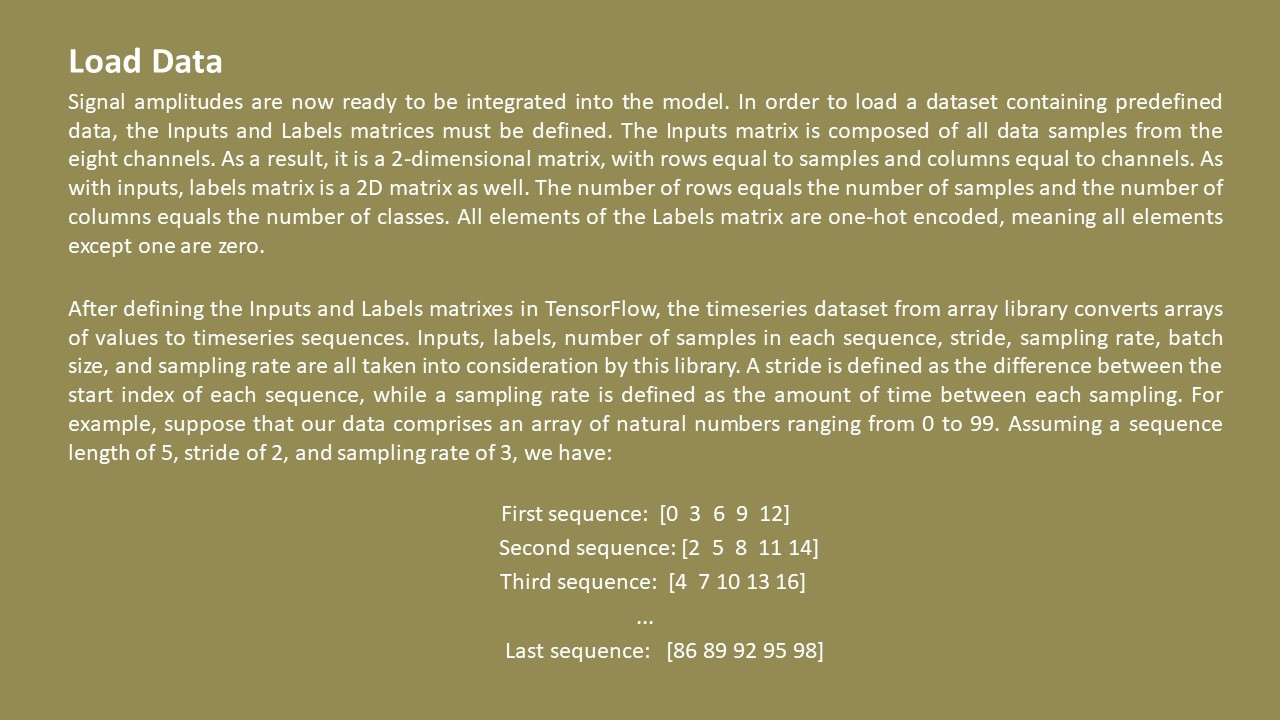

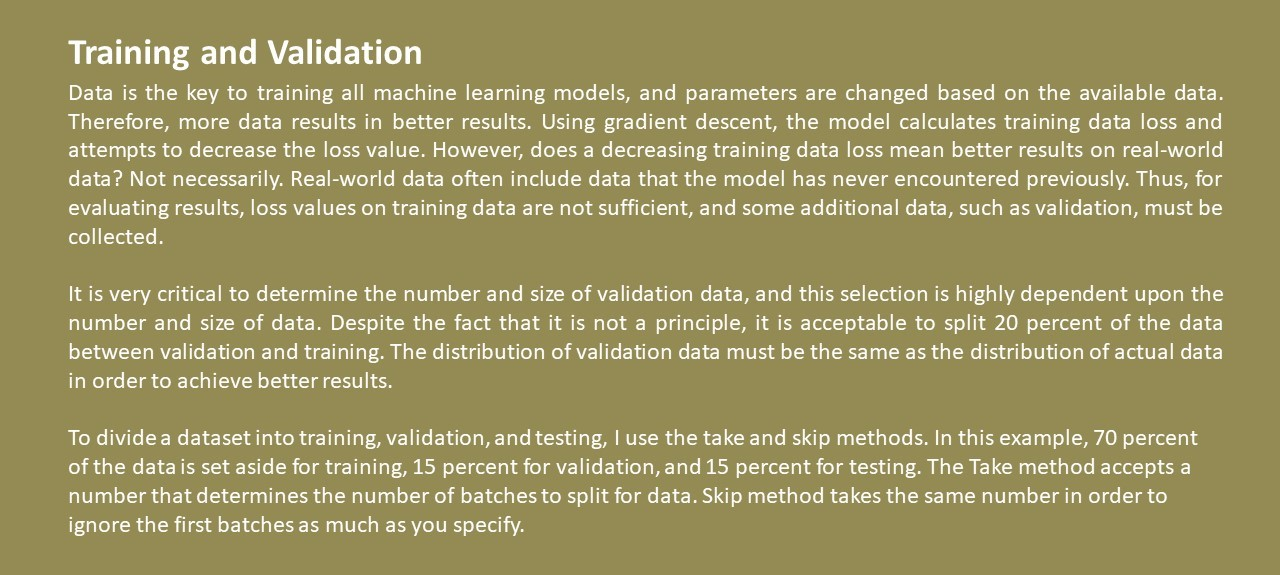

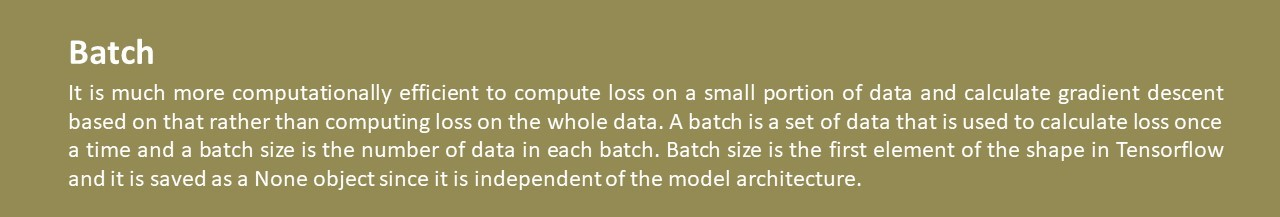

In [26]:
total_number = 1499054
batch_size = 256
train_size = 4099
val_size = 878
test_size = 878

inputs = np.zeros((1498880+19, 8))
labels = np.zeros((1498880+19, 6))

for i, label in enumerate(dataset['class'][ma_rate:1498880+ma_rate+19]):
      labels[i, label-1] = 1

for i in range(8):
    inputs[:, i] = dataset[f'n_channel{i+1}'][ma_rate:1498880+ma_rate+19]

data = tf.keras.utils.timeseries_dataset_from_array(inputs, labels, 10, 1, 2, batch_size=batch_size)
data = data.shuffle(1498880, reshuffle_each_iteration=False)

train_dataset = data.take(4099)
validation_dataset = data.skip(4099).take(878)
test_dataset = data.skip(4099).skip(878)

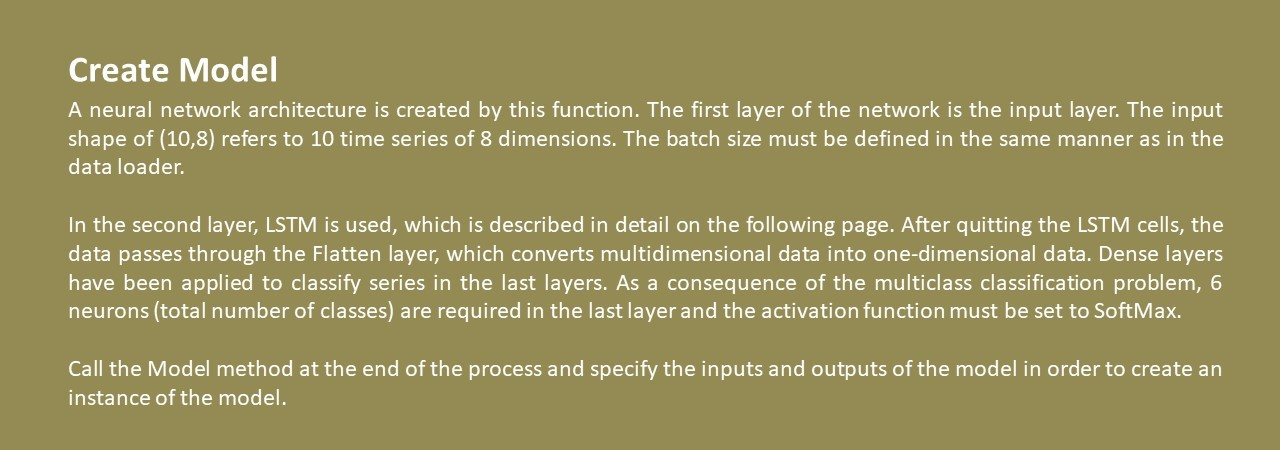

In [27]:
def create_model(input_shape=(10, 8)):
  inputs = tfl.Input(shape=input_shape, batch_size=256)
  #x = tfl.SimpleRNN(32, activation='tanh', return_sequences=True)(inputs)
  x = tfl.LSTM(64)(inputs)
  x = tfl.Flatten()(x)
  x = tfl.Dense(64, activation='relu')(x)
  x = tfl.Dense(16, activation='relu')(x)
  x = tfl.Flatten()(x)
  x = tfl.Dense(6, activation='softmax')(x)
  model = tf.keras.Model(inputs, x)
  return model

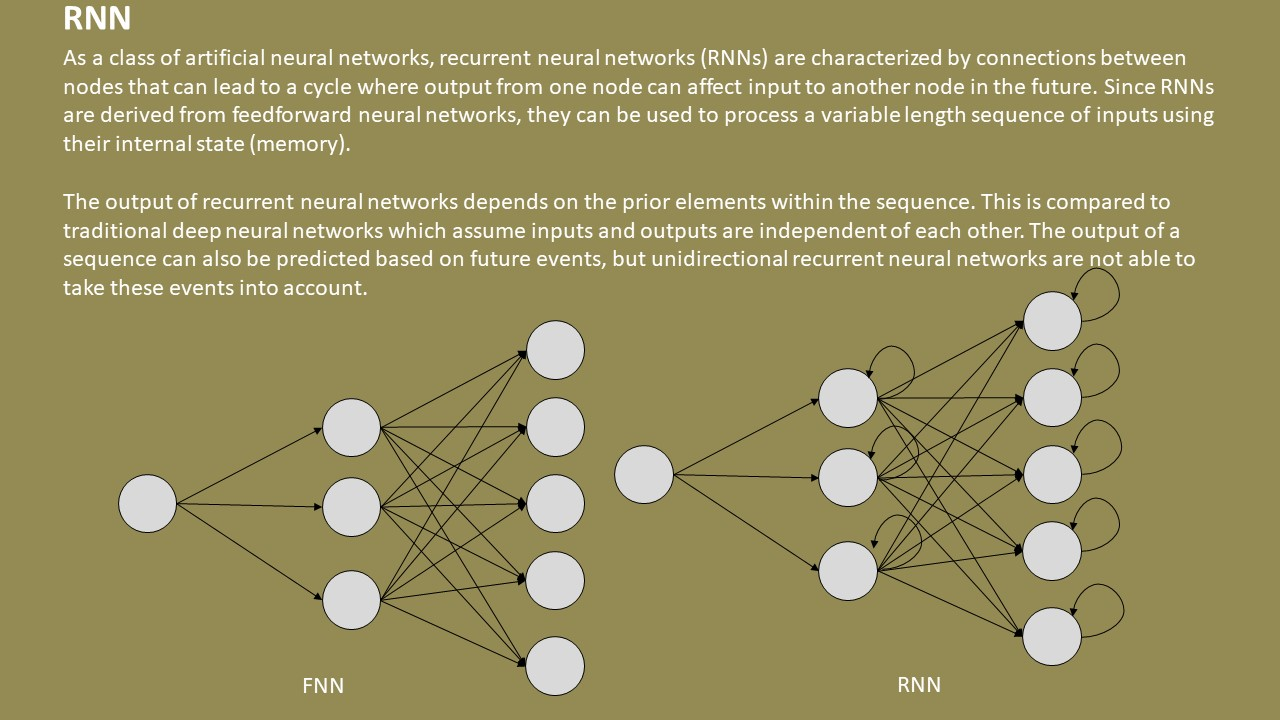

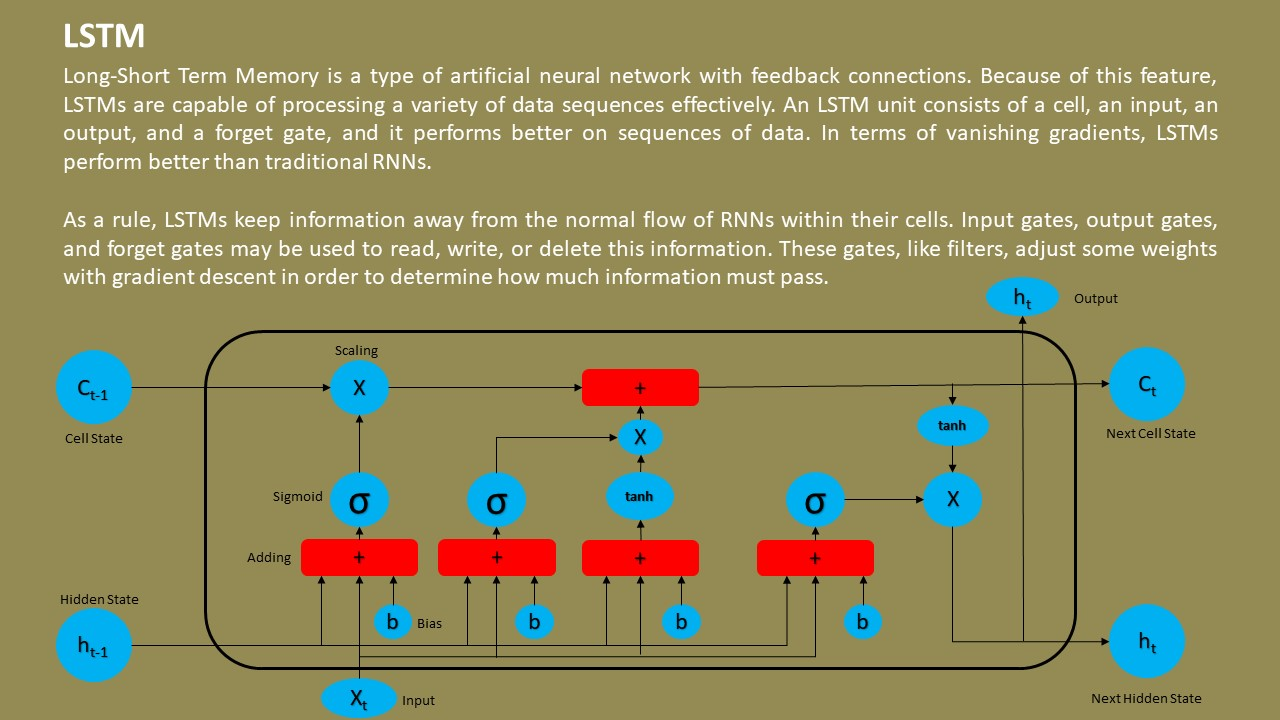

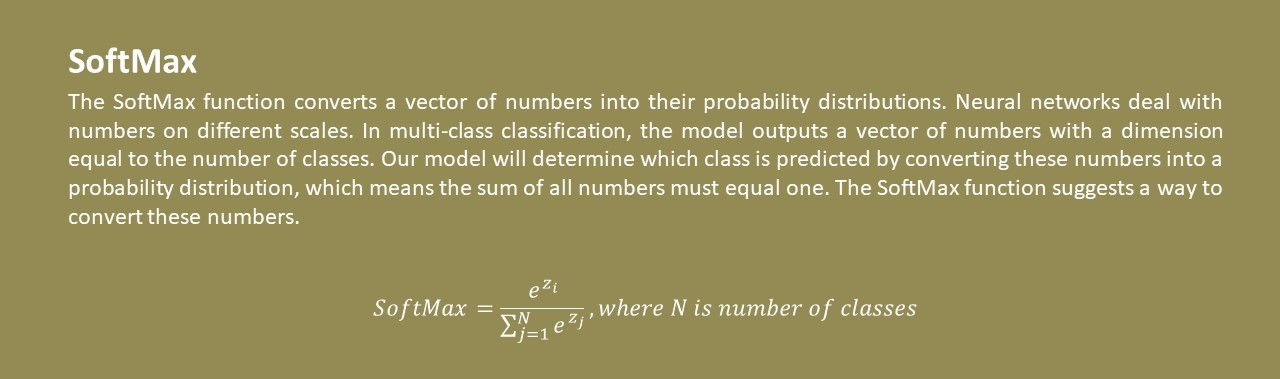

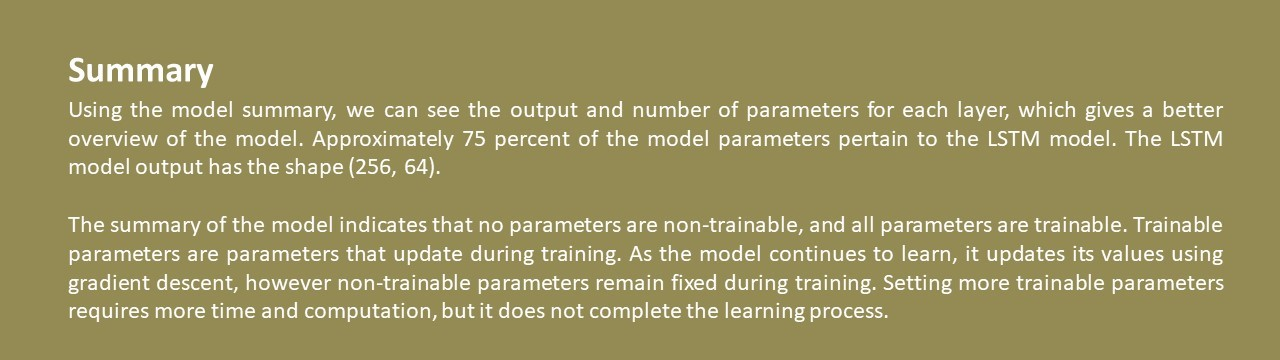

In [28]:
model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(256, 10, 8)]            0         
                                                                 
 lstm (LSTM)                 (256, 64)                 18688     
                                                                 
 flatten (Flatten)           (256, 64)                 0         
                                                                 
 dense (Dense)               (256, 64)                 4160      
                                                                 
 dense_1 (Dense)             (256, 16)                 1040      
                                                                 
 flatten_1 (Flatten)         (256, 16)                 0         
                                                                 
 dense_2 (Dense)             (256, 6)                  102   

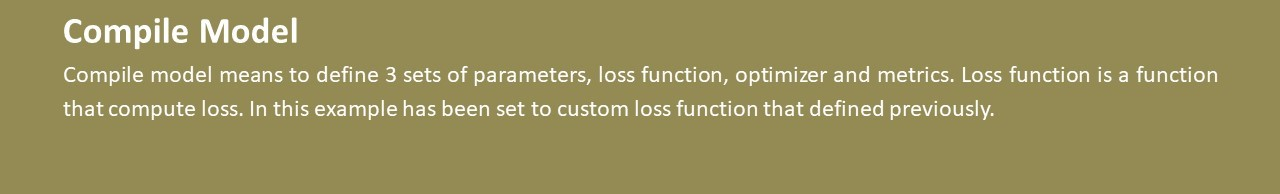

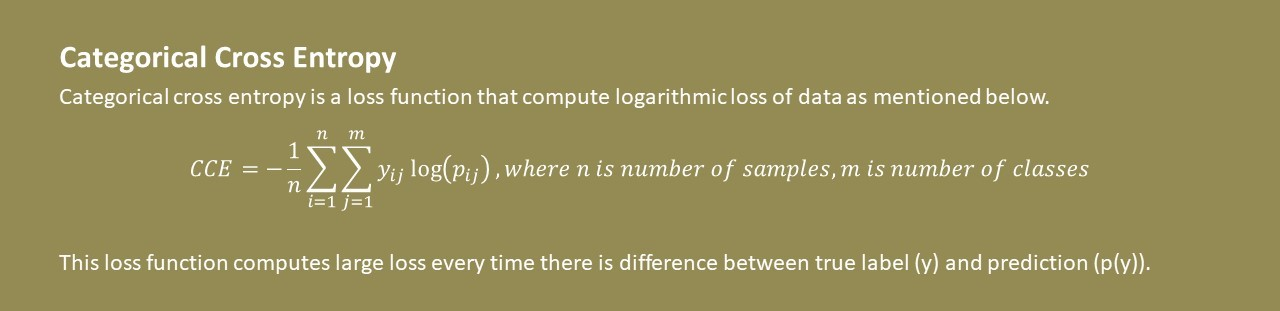

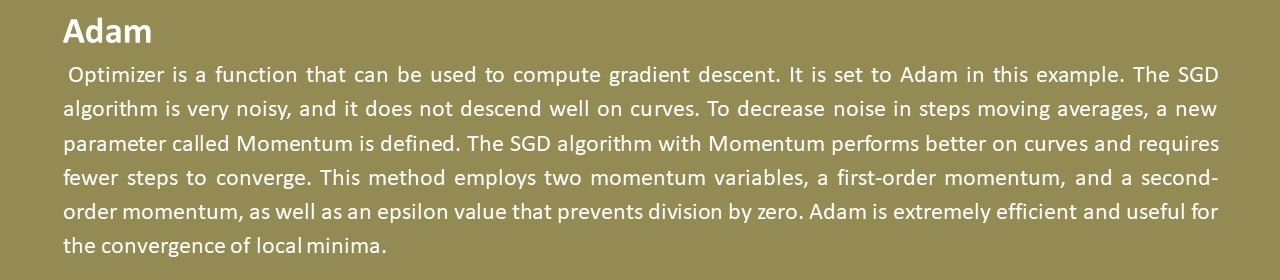

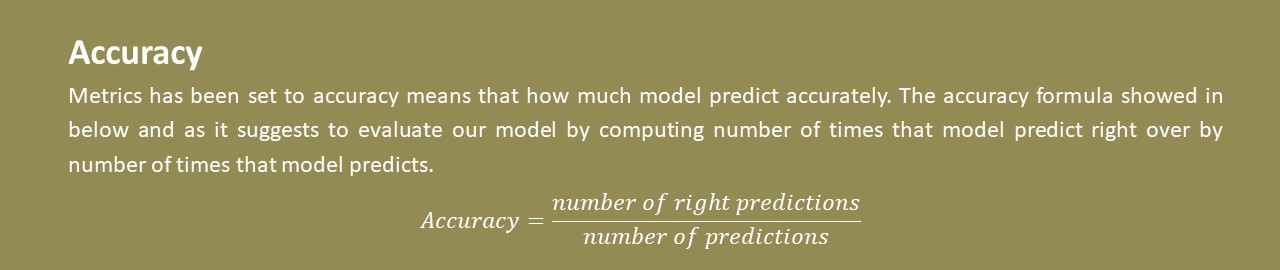

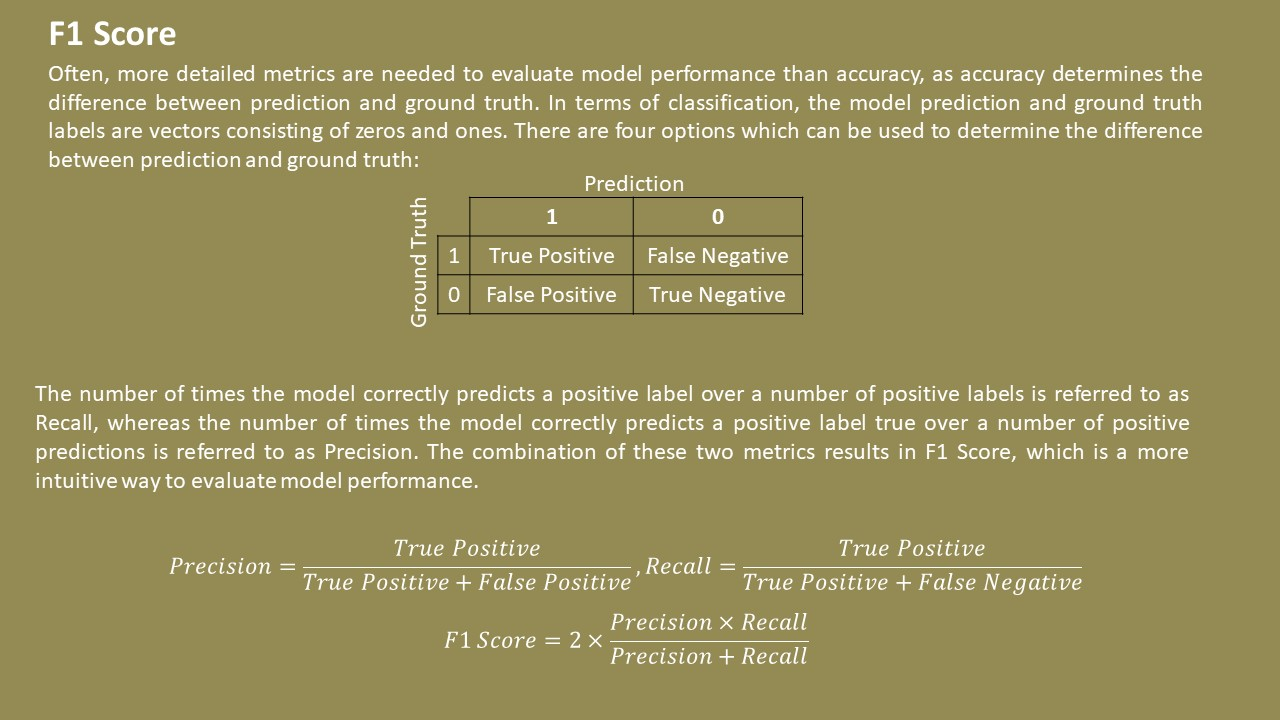

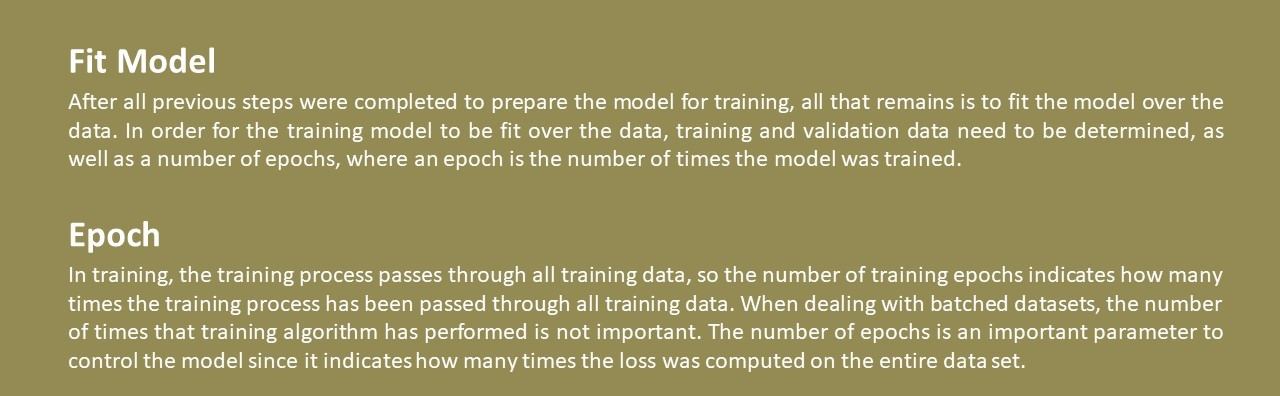

In [29]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy', F1Score(6, average='macro', threshold=0.5)])
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
4099/4099 [==============================] - 361s 52ms/step - loss: 1.0615 - accuracy: 0.5276 - f1_score: 0.4176 - val_loss: 0.7553 - val_accuracy: 0.7101 - val_f1_score: 0.6930
Epoch 2/10
4099/4099 [==============================] - 360s 52ms/step - loss: 0.6947 - accuracy: 0.7528 - f1_score: 0.7415 - val_loss: 0.6329 - val_accuracy: 0.7699 - val_f1_score: 0.7684
Epoch 3/10
4099/4099 [==============================] - 363s 52ms/step - loss: 0.5949 - accuracy: 0.7841 - f1_score: 0.7807 - val_loss: 0.5825 - val_accuracy: 0.7853 - val_f1_score: 0.7808
Epoch 4/10
4099/4099 [==============================] - 369s 53ms/step - loss: 0.5497 - accuracy: 0.8004 - f1_score: 0.7978 - val_loss: 0.5324 - val_accuracy: 0.8022 - val_f1_score: 0.7978
Epoch 5/10
4099/4099 [==============================] - 365s 52ms/step - loss: 0.5148 - accuracy: 0.8130 - f1_score: 0.8115 - val_loss: 0.5237 - val_accuracy: 0.8061 - val_f1_score: 0.8044
Epoch 6/10
4099/4099 [==============================] -

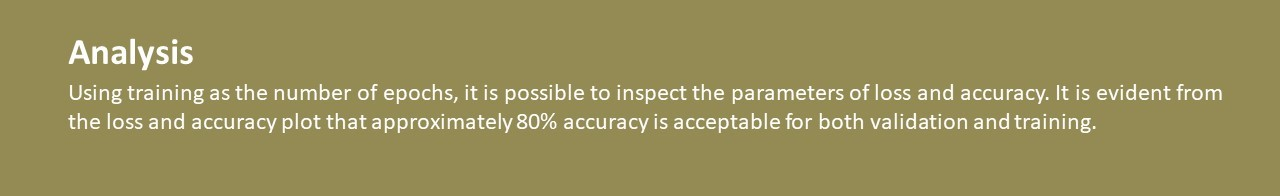

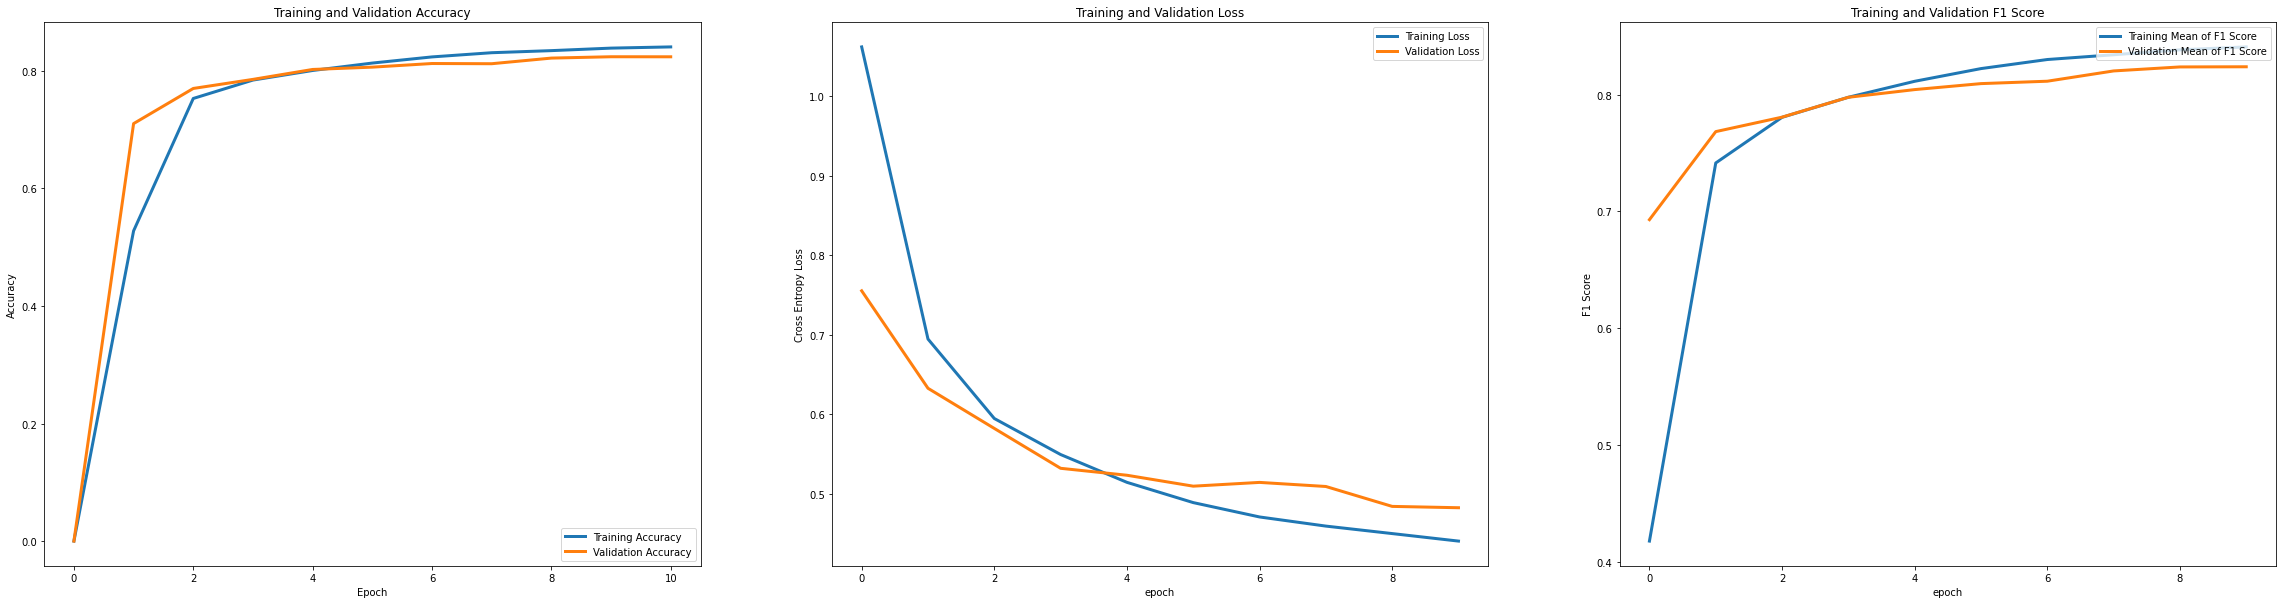

In [30]:
acc = [0.] + history.history['accuracy']             #load training accuracy of the model   
val_acc = [0.] + history.history['val_accuracy']     #load validation accuarcy of the model
loss = history.history['loss']                                #load training loss of the model
val_loss = history.history['val_loss']                          #load validation loss of the model
f1_s =  history.history['f1_score']
val_f1_s = history.history['val_f1_score']
fig = plt.figure(figsize=(40, 10))
plt.subplot(1, 3, 1)                                          #plot accuarcy vs epochs
plt.plot(acc, label='Training Accuracy', linewidth=3)
plt.plot(val_acc, label='Validation Accuracy', linewidth=3)
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.title('Training and Validation Accuracy')

plt.subplot(1, 3, 2)                                         #plot loss vs epochs
plt.plot(loss, label='Training Loss', linewidth=3)
plt.plot(val_loss, label='Validation Loss', linewidth=3)
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy Loss')
plt.xlabel("epoch")
plt.title('Training and Validation Loss')
plt.subplot(1, 3, 3)                                         #plot loss vs epochs
plt.plot(f1_s, label='Training Mean of F1 Score', linewidth=3)
plt.plot(val_f1_s, label='Validation Mean of F1 Score', linewidth=3)
plt.legend(loc='upper right')
plt.ylabel('F1 Score')
plt.xlabel("epoch")
plt.title('Training and Validation F1 Score')
plt.show()

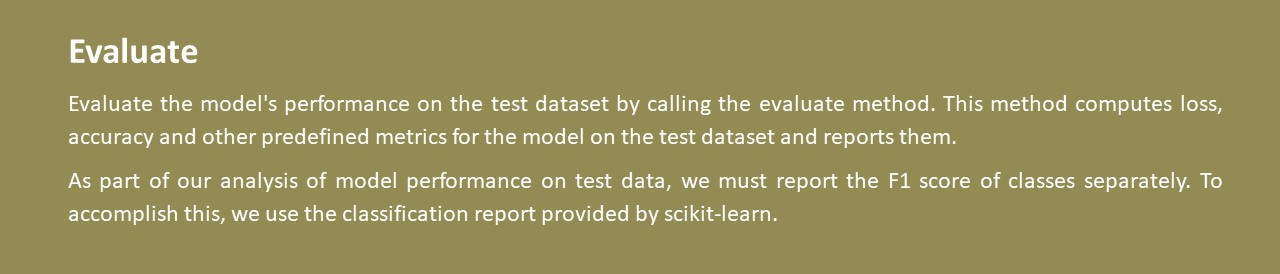

In [33]:
model.evaluate(test_dataset)

878/878 [==============================] - 157s 7ms/step - loss: 0.4785 - accuracy: 0.8334 - f1_score: 0.8301


[0.47850096225738525, 0.8333837389945984, 0.8300747871398926]

In [54]:
test_inputs = []
test_labels = []
unbatched = test_dataset.unbatch()
for test_input, test_label in unbatched.take(-1):
  test_inputs.append(test_input)
  test_labels.append(test_label)
test_inputs = np.array(test_inputs)
test_labels = np.array(test_labels)
preds = model.predict(test_inputs)

7024/7024 [==============================] - 15s 2ms/step


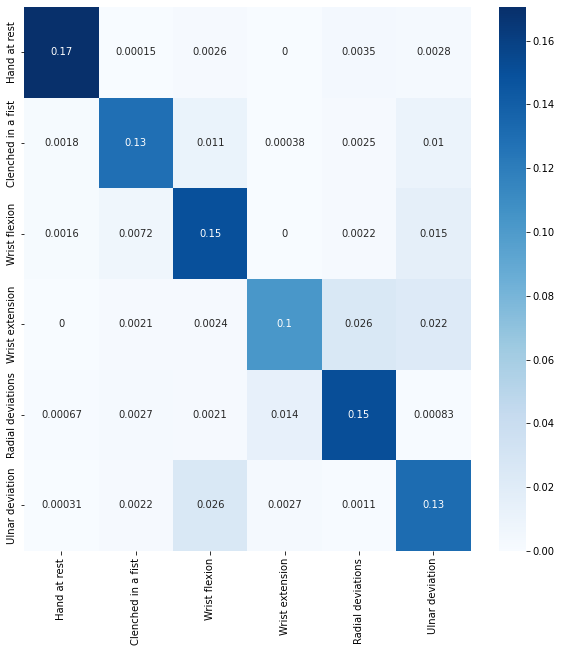

In [55]:
columns = ['Hand at rest',	'Clenched in a fist',	'Wrist flexion', 'Wrist extension',	'Radial deviations',	'Ulnar deviation']
cm = np.zeros((6, 6))
test_labels_am = np.argmax(test_labels, axis=1)
preds_am = np.argmax(preds, axis=1)
for i in range(224768):
  cm[test_labels_am[i]][preds_am[i]] = cm[test_labels_am[i]][preds_am[i]] + 1
cm = cm/224768
plt.figure(figsize=(10, 10))
cf_matrix = pd.DataFrame(cm, columns=columns, index=columns)
sns.heatmap(cf_matrix, annot=True, cmap="Blues")
plt.savefig("cm.jpg", format='jpg', dpi=600)

In [63]:
clr = classification_report(test_labels_am, preds_am, target_names=columns, output_dict=True)
clr_df = pd.DataFrame(clr)
clr_df

Hand at rest  Clenched in a fist  Wrist flexion  Wrist extension  \
precision      0.975291            0.899885       0.773651         0.854927   
recall         0.949628            0.832519       0.849850         0.661614   
f1-score       0.962289            0.864892       0.809962         0.745949   
support    40360.000000        34798.000000   39607.000000     34898.000000   

           Radial deviations  Ulnar deviation  accuracy      macro avg  \
precision           0.810200         0.717777  0.833384       0.838622   
recall              0.879566         0.803315  0.833384       0.829415   
f1-score            0.843459         0.758141  0.833384       0.830782   
support         38544.000000     36561.000000  0.833384  224768.000000   

            weighted avg  
precision       0.839199  
recall          0.833384  
f1-score        0.833195  
support    224768.000000